# **PROYECTO INTEGRADOR M4**

# *1° avance*

# BIOGENESYS
Empresa farmacéutica busca identificar las ubicaciones óptimas para la expansión de laboratorios farmacéuticos, basándose en el análisis de datos de incidencia de COVID-19, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias.
## Objetivos
1. Realizar un análisis exploratorio de datos sobre la incidencia de COVID-19 y otros factores relevantes, identificando tendencias y oportunidades mediante estadísticas, mediciones y visualizaciones.
2. Aplicar técnicas de limpieza de datos para asegurar la calidad de los datos, facilitando análisis y decisiones estratégicas confiables.
3. Mejorar el acceso a los datos mediante operaciones eficientes de extracción, transformación y carga (ETL), aumentando la eficacia del análisis y la toma de decisiones.
4. Desarrollar dashboards interactivos con visualizaciones eficientes, permitiendo explorar datos desde múltiples perspectivas para una toma de decisiones informada y estratégica. 

### 1. Importa las librerías que necesitarás para realizar el 1° avance del PI

In [1]:
# Carga de librerías necesarias (se importan en un sólo bloque del código)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os


### 2. Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code

In [2]:
data = pd.read_csv(r"C:\Users\Nuevo\Desktop\henry\modulo 4\data_latinoamerica.csv")

In [3]:
data #primera columna es el index, Nan son valores vacíos. Puedo verlo con Data Viewer también

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12216052         VE_Z  2022-09-13           VE    Venezuela            NaN   
12216053         VE_Z  2022-09-14           VE    Venezuela            NaN   
12216054         VE_Z  2022-09-15           VE    Venezuela            NaN   
12216055         VE_Z  2022-09-16           VE    Venezuela            NaN   
12216056         VE_Z  2022-09-17           VE    Venezuela            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12216052           NaN                   NaN                  NaN   
12216053           NaN                   NaN                  NaN   
12216054           NaN                   NaN                  NaN   
12216055           NaN                   NaN                  NaN   
12216056           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12216052                                    NaN   1422000.0  ...   
12216053                                    NaN   1422000.0  ...   
12216054                                    NaN   1422000.0  ...   
12216055                                    NaN   1422000.0  ...   
12216056                                    NaN   1422000.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12216052                      NaN               NaN               NaN   
12216053                      NaN               NaN               NaN   
12216054                      NaN               NaN               NaN   
12216055                      NaN               NaN               NaN   
12216056                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12216052              NaN                        NaN   
12216053              NaN                        NaN   
12216054              NaN                    

### 3. Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (12,216,057 filas y 50 columnas)

In [4]:
np.shape(data) #numpy para la forma que tiene nuestro dataset

(12216057, 50)

In [5]:
data.shape #panda para la forma que tiene nuestro DataFrame

(12216057, 50)

### 4. Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil

In [6]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
#mask=data['country_name'].isin(paises_seleccionados) con pandas usamos isin. Recorre el registro y si esta dentro de los paises, se hace la mascara y utilizo los TRUE en el filtrado. 
#no se hace una variable para un condicional, sino que se escribe dentro:

data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)] #me filtra la data, no borra elementos. Los guardo en otra variable, la original sigue siendo data.


In [7]:
np.shape(data_latinoamerica) #me fijo cuantos datos quedaron filtrados

(11970289, 50)

### 5. Compara a nivel de país para llenar valores faltantes:

In [8]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000] #nos preguntamos que tan buena es la calidad de los datos. Verificamos la cantidad de faltantes por columna y
#si es necesario haremos una limpieza de los datos donde se presenten valores mayores a 4 millones de datos faltantes(una mask para filtrar, 1/3 de la información que tengo). 
#Con esa suma veo cuales son los problematicos.
#mask=[data_latinoamerica.isnull().sum()>4000000]. 

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [9]:
data_latinoamerica.country_name.value_counts() #cantidad de valores unicos que tengo, en vez de ciclo for uso este método de pandas.

country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64

In [10]:
data_latinoamerica.location_key.value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_147       991
AR_A_140       991
AR_A_133       991
AR_A_126       991
AR_A_119       991
Name: count, Length: 12079, dtype: int64

In [11]:
# Haciendo el análisis de calidad de datos, puedo deducir que el primer filtrado esta bien hecho para los paises mencionados pero en location key se repite valores. Esto es la razón 
#de tantos datos faltantes en muchas columnas, por lo que hacemos un nuevo filtro por la columna location_key pero sólo con instancias que correspondan a los paises seleccionados y 
#no a sus regiones o subregiones: AR, CL, CO, MX, PE, BR.

data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

data_latinoamerica_paises.shape

(5946, 50)

### 6. Filtra los datos en fechas mayores a 2021-01-01:

In [12]:


data_latinoamerica_paises_Fecha2=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

data_latinoamerica_paises_Fecha2.shape


(3744, 50)

In [13]:
data_latinoamerica_paises_Fecha2

location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            NaN   
10253874           PE  2022-09-15           PE         Peru            NaN   
10253875           PE  2022-09-16           PE         Peru            NaN   
10253876           PE  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
371              131.0             1718102.0              47293.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
371                                     34162.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
371                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
371                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    

In [14]:
#Con el nuevo filtro vemos que cantidad de vacíos tenemos y en caso de tenerlos los eliminamos:
valores_nulos_fecha=data_latinoamerica_paises_Fecha2.isnull().sum()[data_latinoamerica_paises_Fecha2.isnull().sum()>0] #contamos valores nulos
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha2))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


### 7. Compara a nivel de país para llenar valores faltantes

In [15]:
#No es lo mismo rellenar una columna con el mismo valor que llenar una columna con los promedios de cada país para que el analisis de datos sea mas consistente:

mask = data_latinoamerica_paises_Fecha2['country_name']=='Argentina' #puedo usar esta columna ya que este DataFrame ya esta filtrado/limpio

data_latinoamerica_paises_Fecha2[mask]['new_confirmed']

367     7767.0
368     4934.0
369    13953.0
370    14085.0
371    14496.0
        ...   
986        0.0
987        NaN
988        NaN
989        NaN
990        NaN
Name: new_confirmed, Length: 624, dtype: float64

In [16]:
valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

### 8. Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes

In [17]:
data_latinoamerica_paises_Fecha2['new_recovered'] = data_latinoamerica_paises_Fecha2['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha2['cumulative_recovered'] = data_latinoamerica_paises_Fecha2['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha2['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha2['cumulative_vaccine_doses_administered'].fillna(0)
    


C:\Users\Nuevo\AppData\Local\Temp\ipykernel_4608\674538864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha2['new_recovered'] = data_latinoamerica_paises_Fecha2['new_recovered'].fillna(0)
C:\Users\Nuevo\AppData\Local\Temp\ipykernel_4608\674538864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha2['cumulative_recovered'] = data_latinoamerica_paises_Fecha2['cumulative_recovered'].fillna(0)
C:\Users\Nuevo\AppData\Local\Temp\ipykernel_4608\674

In [18]:
print(data_latinoamerica_paises_Fecha2.isnull().sum()[data_latinoamerica_paises_Fecha2.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_Fecha2))
#En las columnas que queria fijar la media no me funciono porque sigo teniendo nulos

new_confirmed                  21
new_deceased                   21
cumulative_confirmed           21
cumulative_deceased            21
average_temperature_celsius    42
minimum_temperature_celsius    41
maximum_temperature_celsius    41
rainfall_mm                    90
relative_humidity              42
dtype: int64
(3744, 50)


In [19]:
for pais in paises_seleccionados:
    pais_data = data_latinoamerica_paises_Fecha2[data_latinoamerica_paises_Fecha2['country_name'] == pais]
    mean_value = pais_data['new_confirmed'].mean()
    data_latinoamerica_paises_Fecha2.loc[data_latinoamerica_paises_Fecha2['country_name'] == pais, 'new_confirmed'] = data_latinoamerica_paises_Fecha2.loc[data_latinoamerica_paises_Fecha2['country_name'] == pais, 'new_confirmed'].fillna(mean_value)

In [20]:
print(data_latinoamerica_paises_Fecha2.isnull().sum()[data_latinoamerica_paises_Fecha2.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_Fecha2))
#Ahora si funciono con 'new_confirmed' usando .loc como me decia que haga

new_deceased                   21
cumulative_confirmed           21
cumulative_deceased            21
average_temperature_celsius    42
minimum_temperature_celsius    41
maximum_temperature_celsius    41
rainfall_mm                    90
relative_humidity              42
dtype: int64
(3744, 50)


In [21]:
#Uso doble ciclo for para el resto de las variables para que sea más rapido y hacerlo de manera más automática:

for pais in paises_seleccionados:
    for columna in ['new_deceased','cumulative_confirmed','cumulative_deceased','average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity']:
        media_columna = data_latinoamerica_paises_Fecha2[data_latinoamerica_paises_Fecha2['country_name'] == pais][columna].mean()
        indices = data_latinoamerica_paises_Fecha2['country_name'] == pais
        data_latinoamerica_paises_Fecha2.loc[indices, columna] = data_latinoamerica_paises_Fecha2.loc[indices, columna].fillna(media_columna)

In [22]:
print(data_latinoamerica_paises_Fecha2.isnull().sum()[data_latinoamerica_paises_Fecha2.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_Fecha2))
#Ahora si no tengo más nulos en todas las columnas.

#Llenar los vacios con 0 en la columna de new_recovered, cumulative_recovered, cumulative_vaccione_doses_administered para hacer analisis de estos datos con ciclo for:
#for columna1 in ['new_recovered', 'cumulative_recovered','cumulative_vaccine_doses_administered']:
    #data_latinoamerica_paises_Fecha[columna1] = data_latinoamerica_paises_Fecha[columna1].fillna(0)
    
#Hay países que no tienen datos en estas columnas entonces tengo que rellenarlo con 0 ya que no me da el promedio. No puedo eliminar toda la columna porque hay paises que tienen datos ni las filas porque pierdo información.
#Es conveniente dejar los 0 y no usar esa columna para analisis de cada pais. En el futuro puede cambiar los 0 si se llena los datos.
#Me da como resultado un anuncio, de que en el futuro se va a usar iloc en vez de [] y el cambio lo hacen progresivos.

Series([], dtype: int64)
(3744, 50)


### 9. Examina las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis. 

##### Puedo hacer un ciclo for para graficar cada uno de estos atributos y hacer la distribución. En este avance, se que una distribución normal me da valores centrales (moda, mediana, media). A medida que la media se aleja de la moda (el valor que más se repite) -> alertas.

### 10. Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [23]:
#Guardo el dataset limpio y filtrado (ETL) por fecha en un archivo csv para poder utilizarlo en el analisis y que no sea necesario cargar el archivo original que es tan pesado. Ahora, con las nuevas dimensiones el archivo es más pequeño y más fácil de manejar.
data_latinoamerica_paises_Fecha2.to_csv("DatosFinalesFiltrado.csv", index=False)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [25]:
#Reinicio el notebook para liberar memoria y cargar sólo el archivo final filtrado para continuar con el análisis:
data_latinoamerica_paises=pd.read_csv('DatosFinalesFiltrado.csv',sep=',')

In [26]:
data_latinoamerica_paises

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    5032.183871   
3741           PE  2022-09-15           PE         Peru    5032.183871   
3742           PE  2022-09-16           PE         Peru    5032.183871   
3743           PE  2022-09-17           PE         Peru    5032.183871   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    197.233871          2.576906e+06        188954.366129   
3741    197.233871          2.576906e+06        188954.366129   
3742    197.233871          2.576906e+06        188954.366129   
3743    197.233871          2.576906e+06        188954.366129   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

### 11. Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:

### ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
### ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
### ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

In [27]:
data_latinoamerica_paises.describe()
#esta formula asi expresada es sólo para valores númericos

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908931    276.887411          6.777074e+06        192957.902075   
std     24219.361378    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

In [28]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-----------------------------------')
    #panda reconoce que es tipo texto y me deja hacer otro análisis. AR es la locación que más se repite.

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%    

In [29]:
#Con ciclo while
i=0
while i<len(data_latinoamerica_paises.columns):
    print(data_latinoamerica_paises.columns[i])
    print(data_latinoamerica_paises[data_latinoamerica_paises.columns[i]].describe())
    print('-----------------------------------')
    i+=1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%    

### 12. Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:

### ¿Qué representa la mediana?
### ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 
### ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

In [30]:
#Creo una funcion que solo muestre los valores numericos y no los valores categoricos, ademas que solo me de la media, mediana y la desviación estandar:

def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('Varianza:',data[i].var())
            print('Rango:',data[i].max()-data[i].min())
            print('Moda:',data[i].mode())
            print('-----------------------------------')

describir_datos(data_latinoamerica_paises)
#No es tan intuitivo verlo así, en el próximo avance con gráficas sería mejor.

new_confirmed
Mediana: 5214.0
Varianza: 586577465.58212
Rango: 298981.0
Moda: 0    0.0
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
Mediana: 100.5
Varianza: 257292.4462981465
Rango: 11447.0
Moda: 0    0.0
Name: new_deceased, dtype: float64
-----------------------------------
cumulative_confirmed
Mediana: 3632143.5
Varianza: 63828420109841.22
Rango: 34567862.0
Moda: 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
-----------------------------------
cumulative_deceas

#### EXTRA CREDIT

In [31]:
#Explorar el uso de funciones de orden superior para una manipulación eficiente de los datos:
    
#En el paso de rellemar los valores nulos, puedo hacerlo con la media de cada país usando group by, transform y lambda:
    
#data_latinoamerica_paises_Fecha2['new_confirmed'] = data_latinoamerica_paises_Fecha2.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(x.mean()))

#Esta línea de código utilizará groupby para agrupar los datos por país y luego utilizará transform junto con una función lambda para llenar los valores faltantes en la columna 'new_confirmed' con la media de cada país.
#Puedo hacer lo mismo con las demás columnas

#El uso de la función transform junto con una función lambda en este contexto es un ejemplo de una función de orden superior en Python. Aquí está el porqué:

# Función de orden superior: La función transform es una función de orden superior. Toma otra función como argumento y aplica esa función a cada grupo de datos dentro de un DataFrame. En este caso, la función que le pasamos es una función lambda.
# Función lambda: La función lambda que pasamos como argumento a transform es otra forma de función de orden superior. Las funciones lambda son funciones anónimas que pueden tomar cualquier número de argumentos pero solo pueden tener una expresión. En este caso, la expresión es x.fillna(x.mean()), que se aplica a cada grupo de datos dentro del DataFrame.

#Por lo tanto, al combinar transform con una función lambda, estamos utilizando funciones de orden superior para realizar una manipulación eficiente de los datos en el DataFrame.


#### El uso de funciones de orden superior para la manipulación eficiente de datos cumple con el objetivo de utilizar un enfoque más elegante y eficiente para trabajar con datos en Python. Al emplear funciones de orden superior, puedo escribir código más compacto y legible, lo que facilita el mantenimiento y la comprensión del código.

# *2° avance*

### 3. Análisis Estadístico con Pandas y Numpy: Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país.

### 4. Visualización de Datos con Matplotlib y Seaborn: Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones. Debes incluir:

#### **Histogramas gráficos de densidad y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.*

#### **Gráficos de barras para comparar diferentes regiones.*

#### **Mapas de calor para identificar correlaciones entre diferentes variables.*

#### **Gráficos de dispersión para explorar posibles relaciones entre las variables.*

Las visualizaciones que puedes realizar son:

- Gráficos de barras de países contra el resto de variables.
- Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.
- Histogramas de las variables que “Sí” tenga cambios de valores.
- Diagrama de dispersión de la temperatura media contra los casos confirmados.
- Diagrama de dispersión de la temperatura media contra las muertes confirmadas.
- Comportamiento de las dosis administradas de todos los países (Valor medio).
- Evolución de dosis administradas por mes de cada país.
- Muertes por mes de cada país.
- Casos confirmados por mes de cada país.
- Recuperaciones de casos por mes de cada país.
- Comparación del Número de Casos Nuevos entre Países.
- Dosis acumuladas por país
- Boxplot de temperatura media de cada país.
- Violinplot de las variables que “Sí” tenga cambios de valores.
- Distribución de la población por grupos de edad.
- Mapa de calor de Métricas por país.
- Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.
- Matriz de correlación de indicadores demográficos y de salud.
- Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

### 5. Identificación de Tendencias y Patrones: Deberás analizar detalladamente los datos relacionados con la incidencia de COVID-19 y las tasas de vacunación, buscando identificar tendencias a largo plazo y patrones estacionales o geográficos. Por ejemplo, puedes investigar la posible influencia de factores como la temperatura en la propagación de la enfermedad, así como también examinar cómo varían los índices de vacunación en diferentes regiones o en distintos momentos del año. Este análisis te permitirá prever áreas de alta prioridad para la asignación de recursos y la implementación de medidas preventivas y de control.

### 6. Personalización de Visualizaciones: Personaliza las visualizaciones para hacerlas más informativas y atractivas. Esto incluirá ajustar paletas de colores, añadir etiquetas y leyendas, tamaño, y utilizar títulos descriptivos para cada gráfico.

In [32]:
#Acercamiento a las estadisticas basicas de los datos. Uso ciclo for para recorrer columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna:

for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-----------------------------------')
    
#repito lo del avance 1, la estadistica

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%    

In [33]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

In [34]:
#Pongo como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo

data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True) #Dejar la fecha como indice y ejecutar la transformación en el mismo dataset

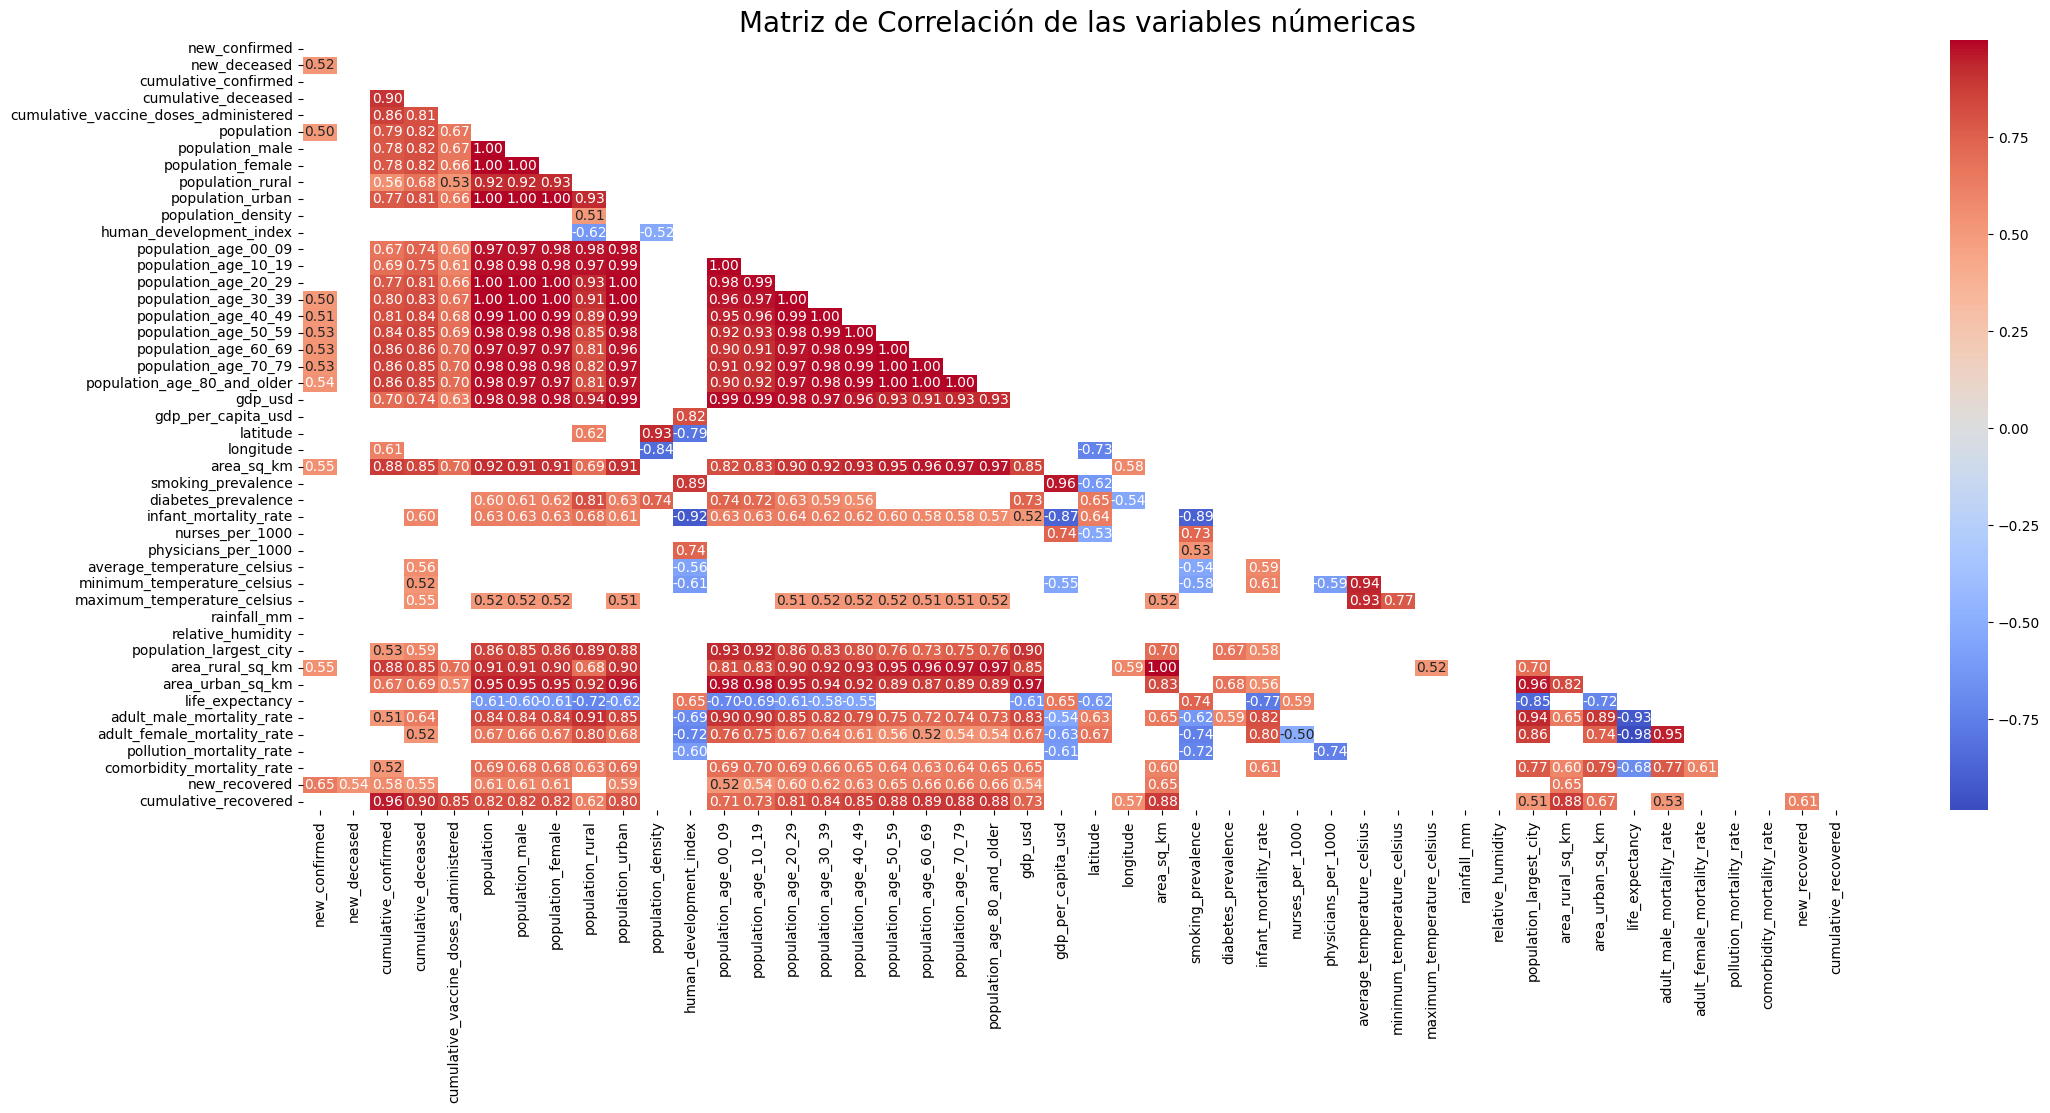

In [35]:
#Realizo un primer acercamiento con una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta en un análisis posterior

#Se crea la matriz de correlación de las variables numéricas
numeric_columns= data_latinoamerica_paises.select_dtypes(include=['float64','int64']).columns
correlation_matrix= data_latinoamerica_paises[numeric_columns].corr()
#Aqui se crea la mask para el triangulo superior
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
#Ahora mostramos los valores superiores a 0.5, es decir donde hay una correlación fuerte. Sin embargo también pueden mostrarse valores negativos
correlation_matrix=correlation_matrix[abs(correlation_matrix)>abs(0.5)]

#Creo la grafica
plt.figure(figsize=(25,10))
heatmap= sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f') #uso seaborn, fmt es el numero de float que me muestra.
plt.title('Matriz de Correlación de las variables númericas', fontsize=20)
plt.show()

#espacios en blanco: porque busco correlaciones mayor a 0.5 (altas), inclusive el negativo porque es que cuando uno sube el otro baja (uso abs)(mas muertes, menos recuperados por ejemplo)
#usando la libreria matplotlib con el submódulo pyplot para generar la figura insertando datos (variables númericas)
#uso sólo la mitad para no repetir información (como un espejo, sobre la diagonal de 1)
#Varibales de mayor correlacion y para identificarlas más rápido se define un umbral mayor a 0.5 absoluto, graficados en un heatmap
#Teniendo una idea de las variables con mayor correlación, puedo hacer un análisis más detallado. Podemos proceder a realizar una rápida revision grafica de la gran mayoría de las columnas para ver como se comportan los datos
#Vamos a utilizar barplots utilizando un ciclo for y la libreria seaborn

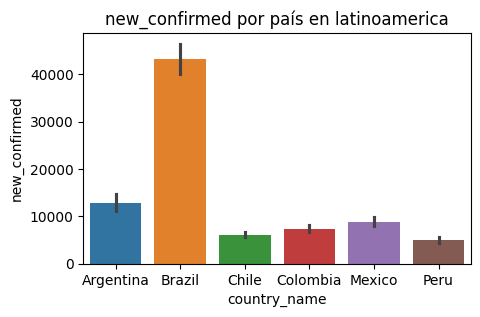

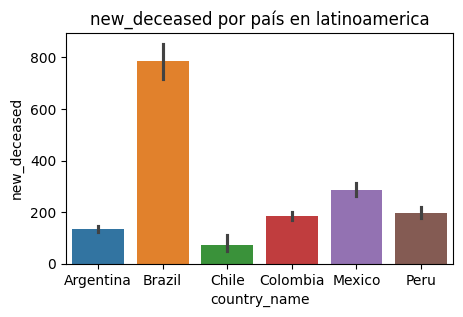

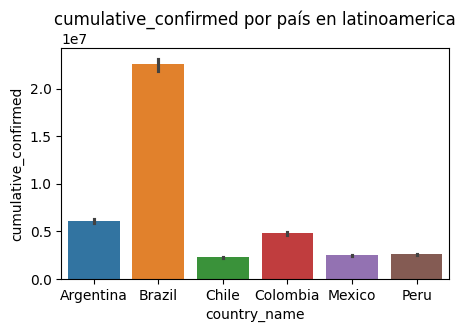

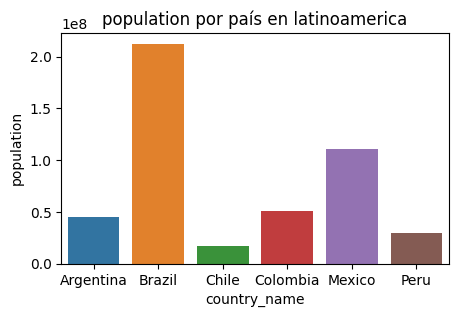

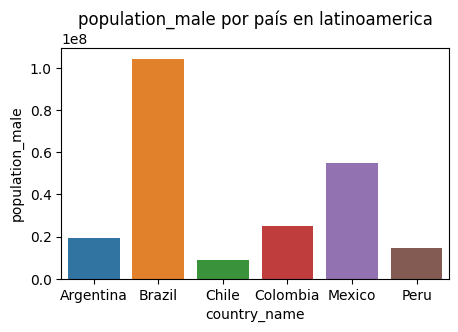

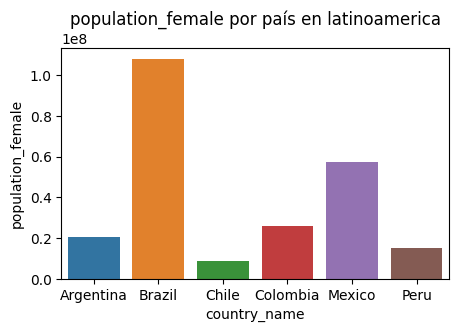

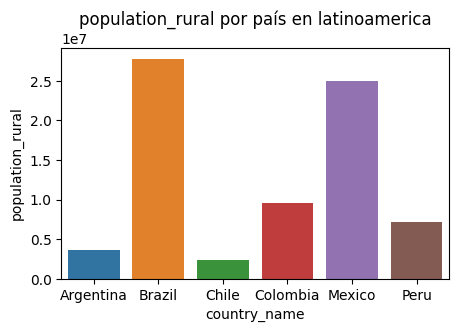

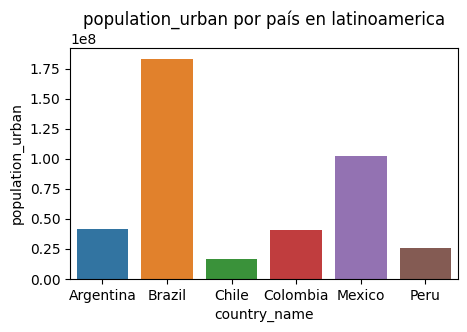

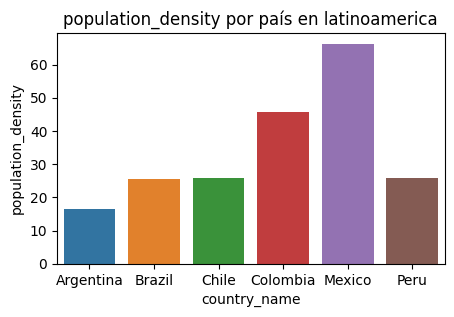

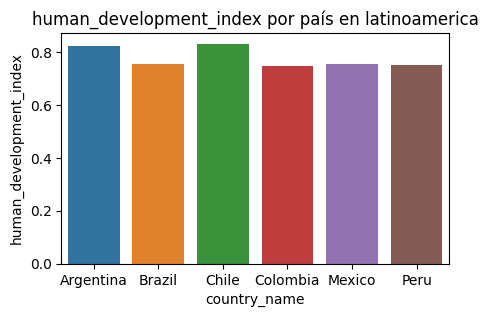

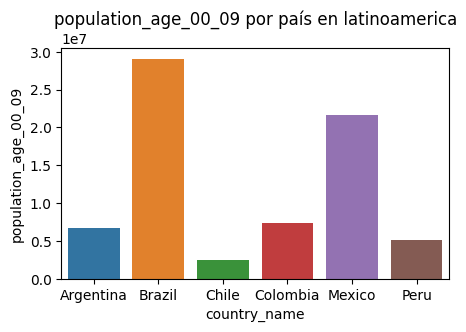

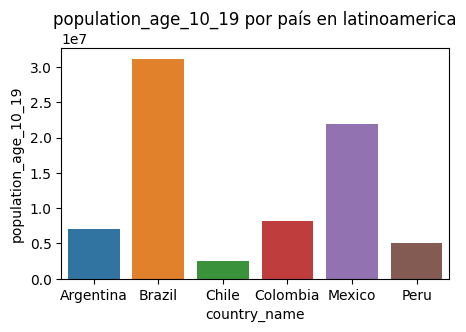

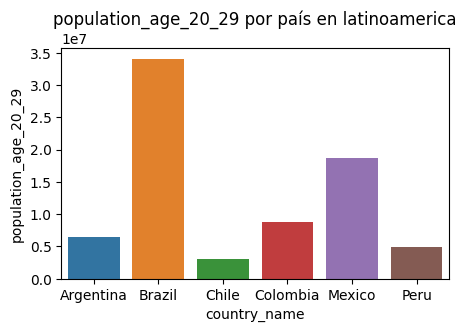

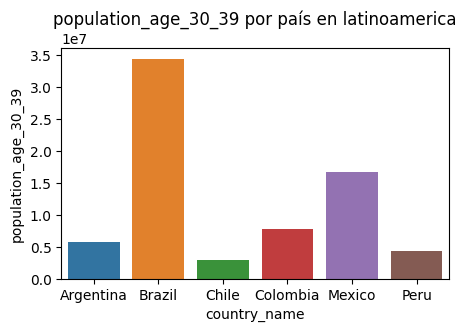

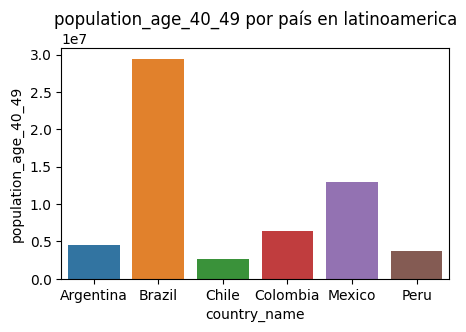

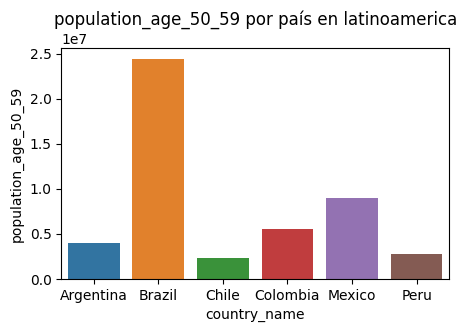

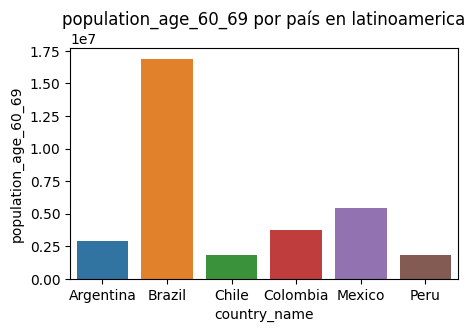

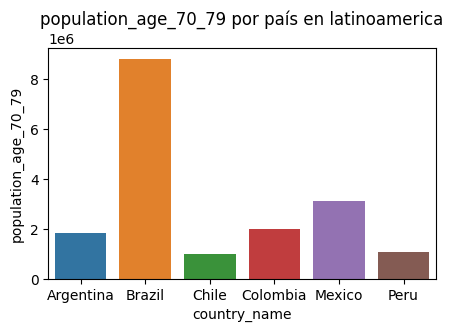

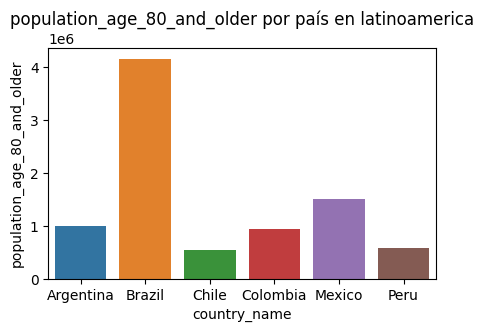

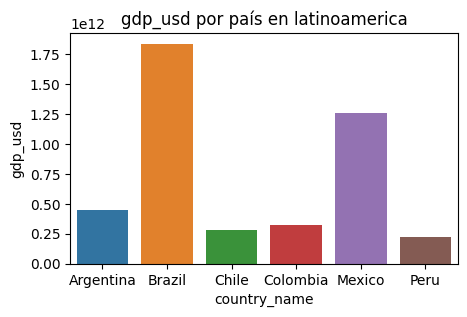

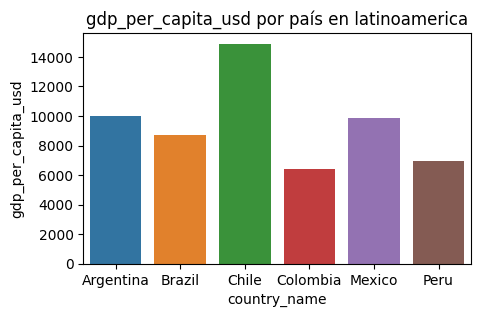

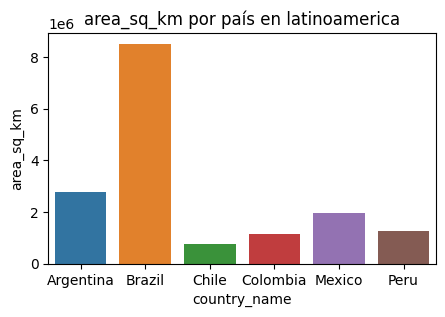

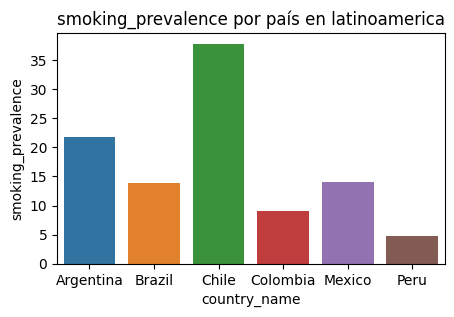

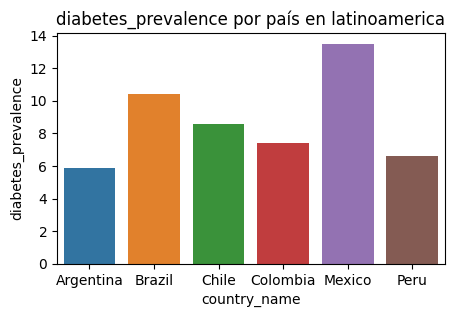

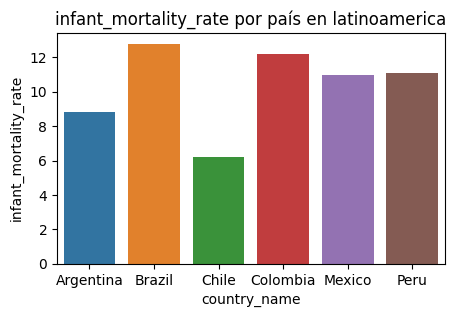

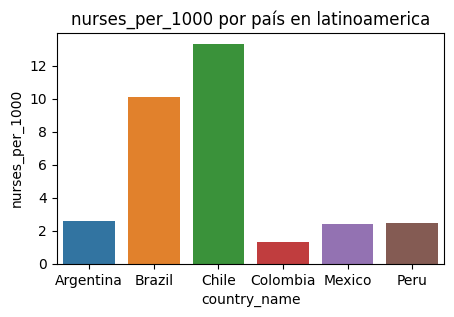

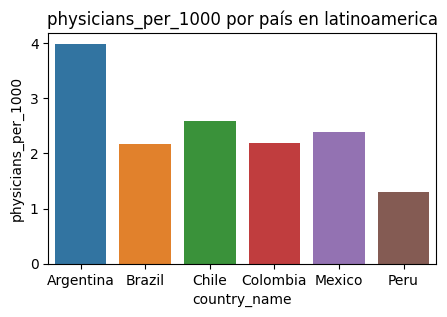

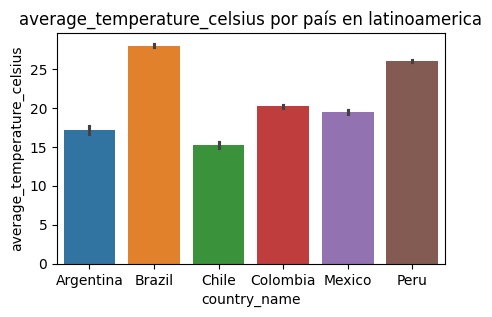

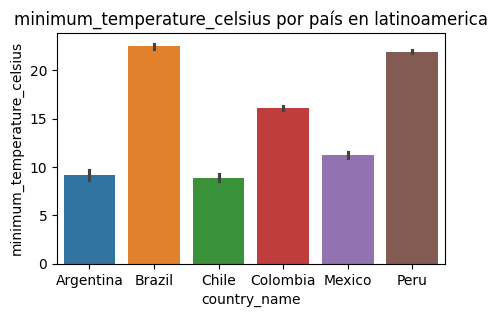

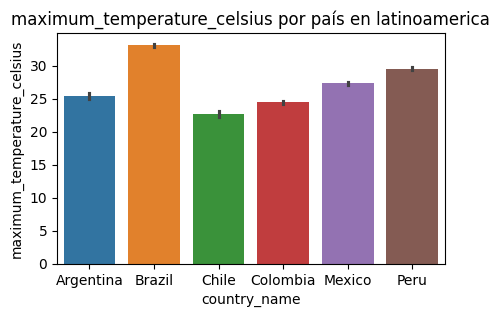

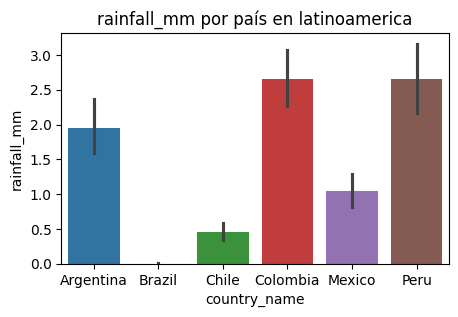

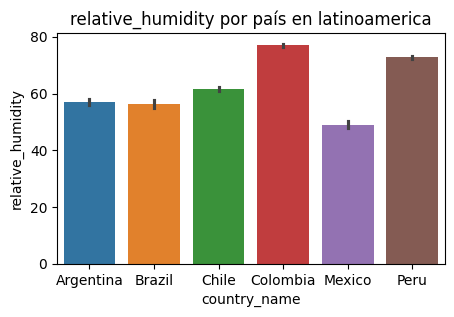

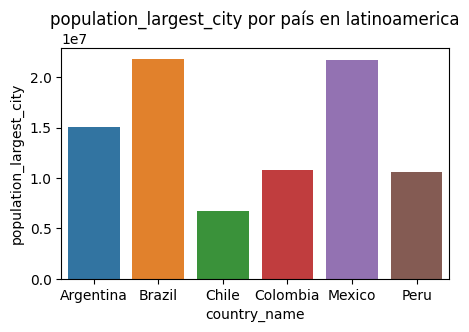

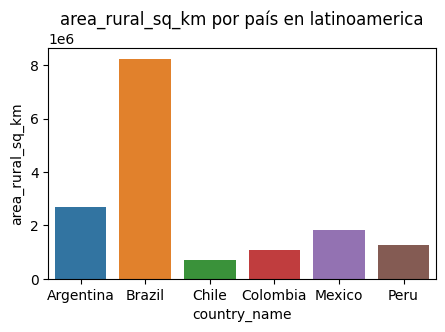

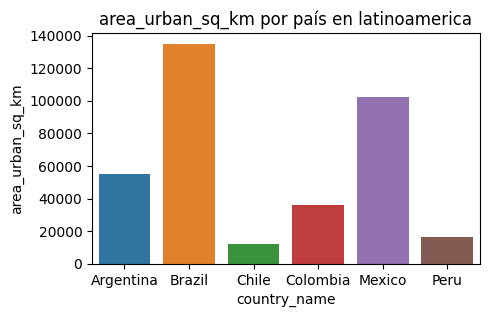

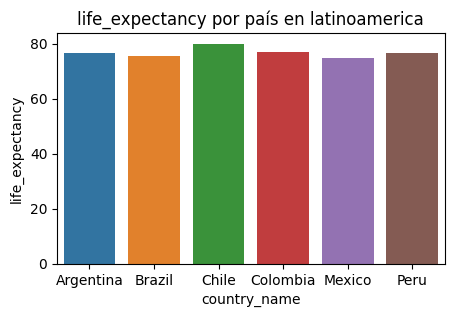

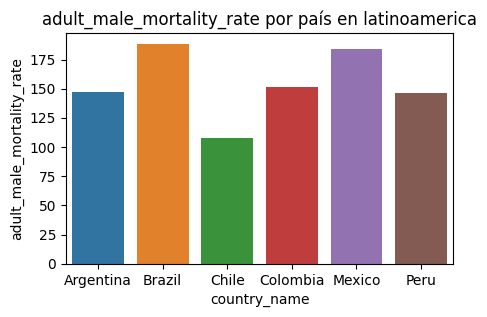

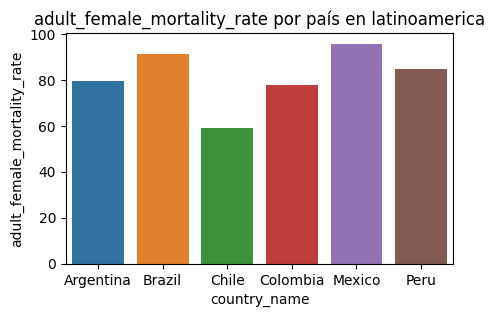

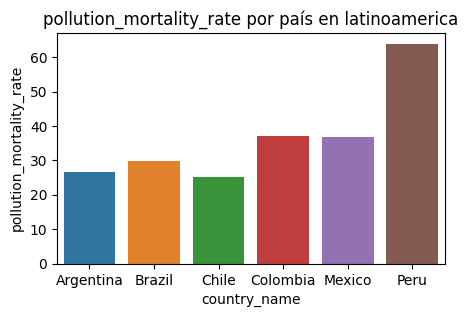

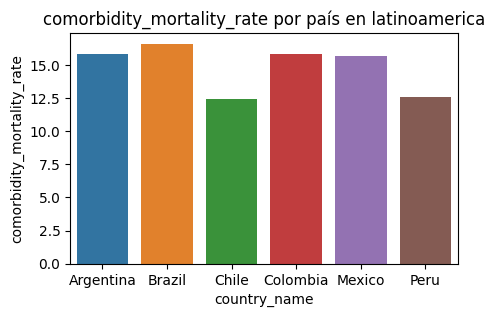

In [36]:
#Diagrams bar for every country in data_latinoamerica_paises with 6 columns

for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_cofirmed','cumulative_deceased', 'cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
        fig,ax = plt.subplots(figsize=(5,3))
        sns.barplot(x='country_name',y=i, data=data_latinoamerica_paises, ax=ax, hue='country_name') #hue me diferencia cada clase(pais) por color. Ax=Ax es el unico que tengo si es un grafico por figura (fig,ax)
        plt.title(f'{i} por país en latinoamerica')
        plt.show()
        
#Dejo por fuera ciertas columnas porque ya se que paises son, muchas fechas variadas, ya se como es distribucion de pais, latitude y longitude tampoco.

In [37]:
#Brasil es mas grande que el resto de los paises, es normal que sean mayores los numeros. Pero territorialmente tambien, lo veo en la densidad vs mexico.
#Rainfall en brasil es muy bajo
#Si al generar un gráfico de barras ves una línea en el medio de cada barra, esta línea generalmente representa la media (o promedio) de los valores de la variable que estás visualizando. Esto es común en algunas visualizaciones de barras, donde la línea de la media se superpone sobre cada barra para proporcionar una referencia visual rápida del valor promedio de la variable.
#Chile tiene mayor nivel de personas que fuman


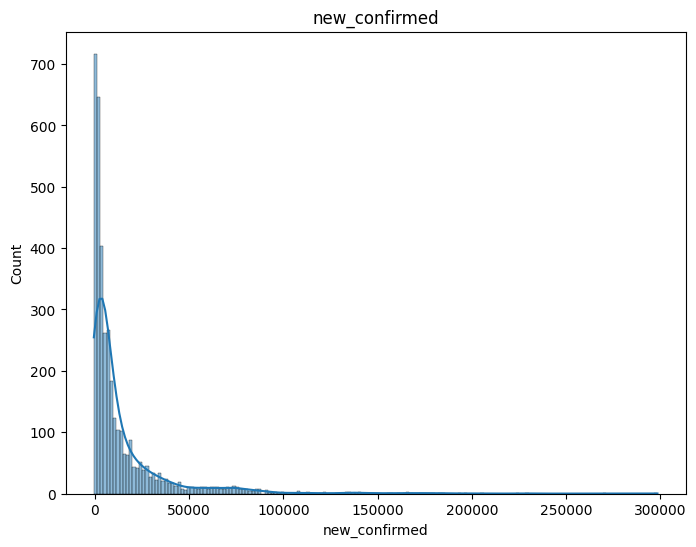

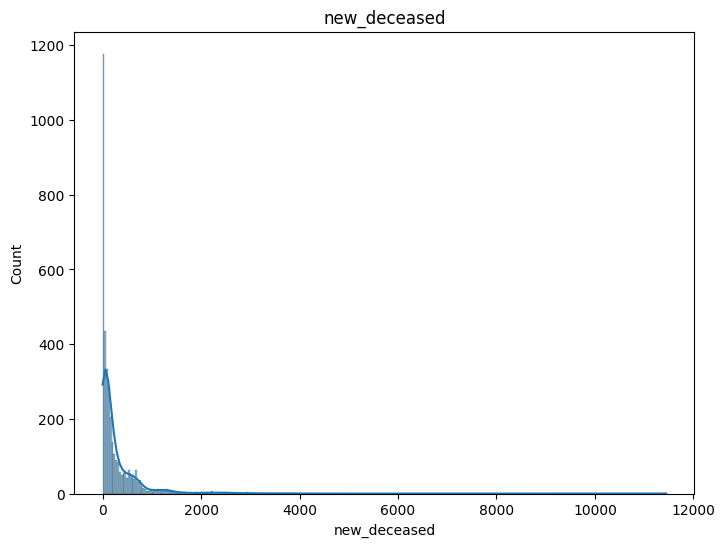

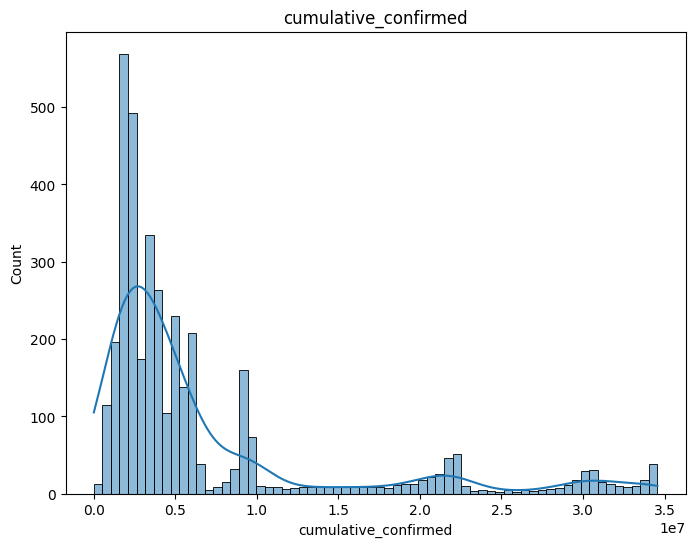

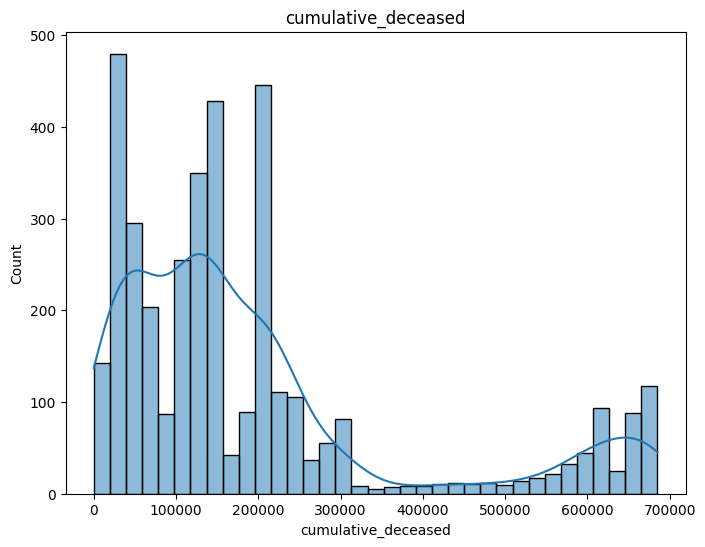

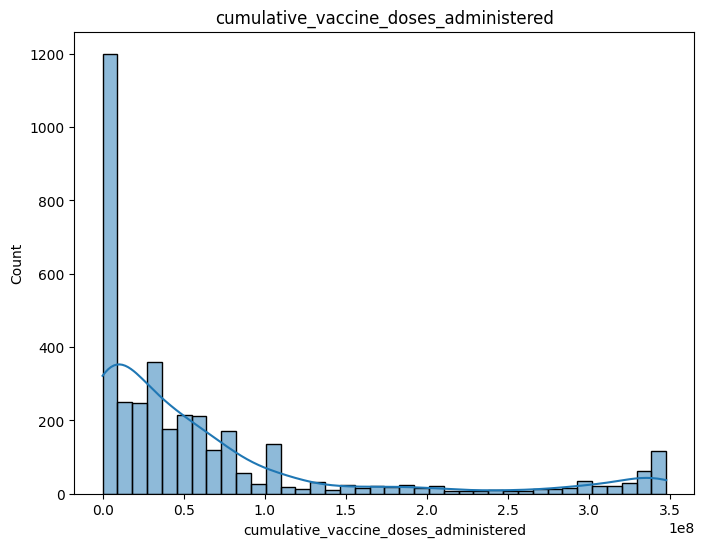

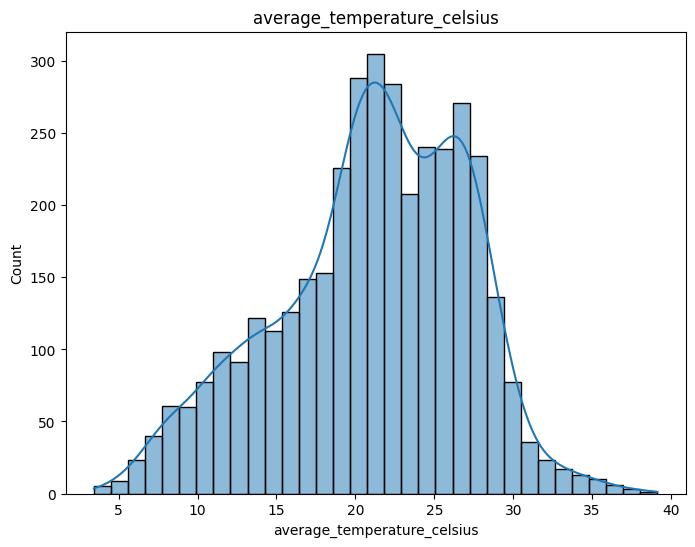

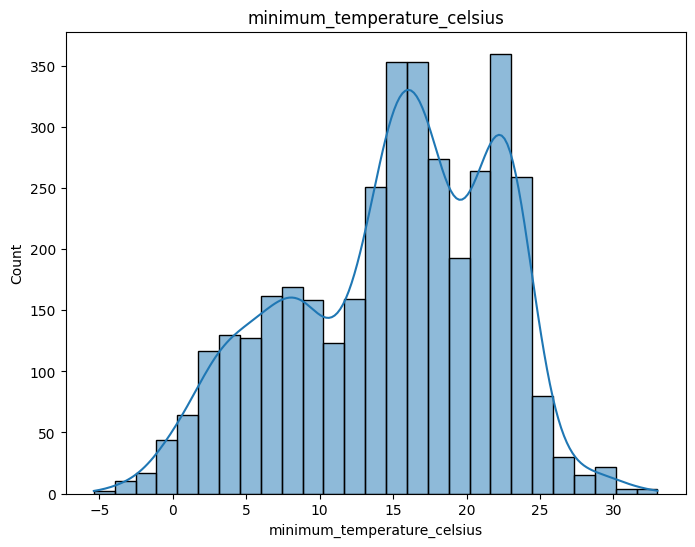

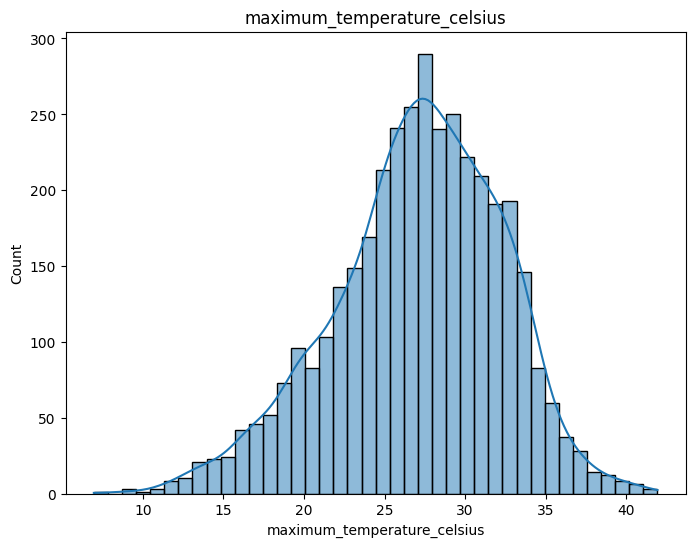

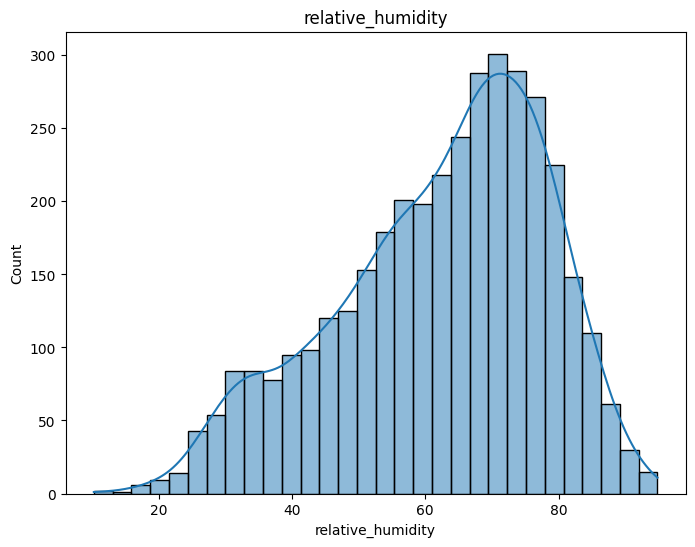

In [38]:
#Repito el proceso con un ciclo for para realizar histogramas y ver la distribución de algunos datos

lista_columnas_6= ['new_confirmed', 'new_deceased','cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius','maximum_temperature_celsius','relative_humidity']
for i in data_latinoamerica_paises[lista_columnas_6]: #Genero histogramas de las variables númericas (flotantes y enteros, los seleccione pero podria incluirlos con codigo)
    fig,ax= plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_paises[i], kde=True)
    plt.title(i)
    plt.show()
    
#Verifico variables con cambios, por ejemplo la población es siempre la misma para brasil
#Puedo ver que pasa con, por ejemplo, la temperatura y despues ir a cada país

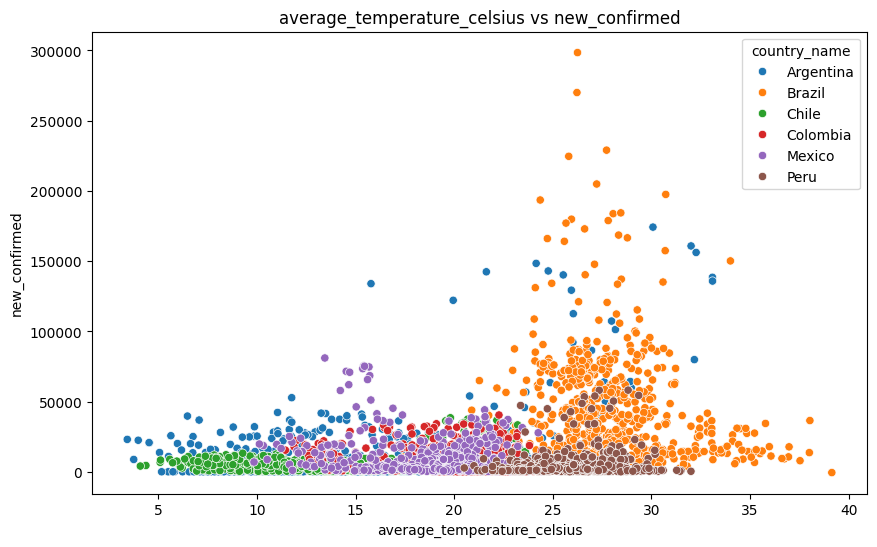

In [39]:
#Grafico average_temperature:celsius vs new_confirme para ver la relación entre estas variables y el compartamiento de los casos respecto a la temperatura

fig,ax= plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius',y='new_confirmed', data=data_latinoamerica_paises, hue='country_name') #defino una sola vez la data
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

#Hago un separador de puntos por color para cada país
#Se puede observar que en algunos paises la temperatura no influye directamente en la cantidad de casos confirmados y en otros si.
#Por esta relación con los casos confirmados, realizo un análisis de la temperatura promedio con la cantidad de muertes


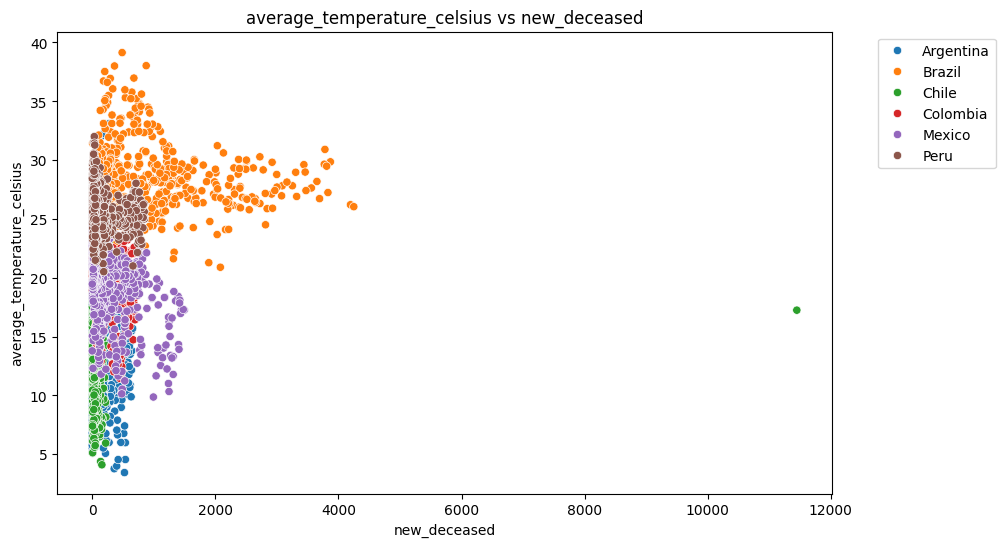

In [40]:
#Grafico average_temperature_celsius vs new_deceased
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left') #La ubicación fuera del gráfico
plt.show()

#Un valor atípico de chile en el grafico
#Se ve un comportamiento similar al de los casos confirmados, en algunos países la temperatura no influye en la cantidad de muertes mientras que en otros se puede observar una relación entre temperatura y cantidad de muertes

C:\Users\Nuevo\AppData\Local\Temp\ipykernel_4608\3937178615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])


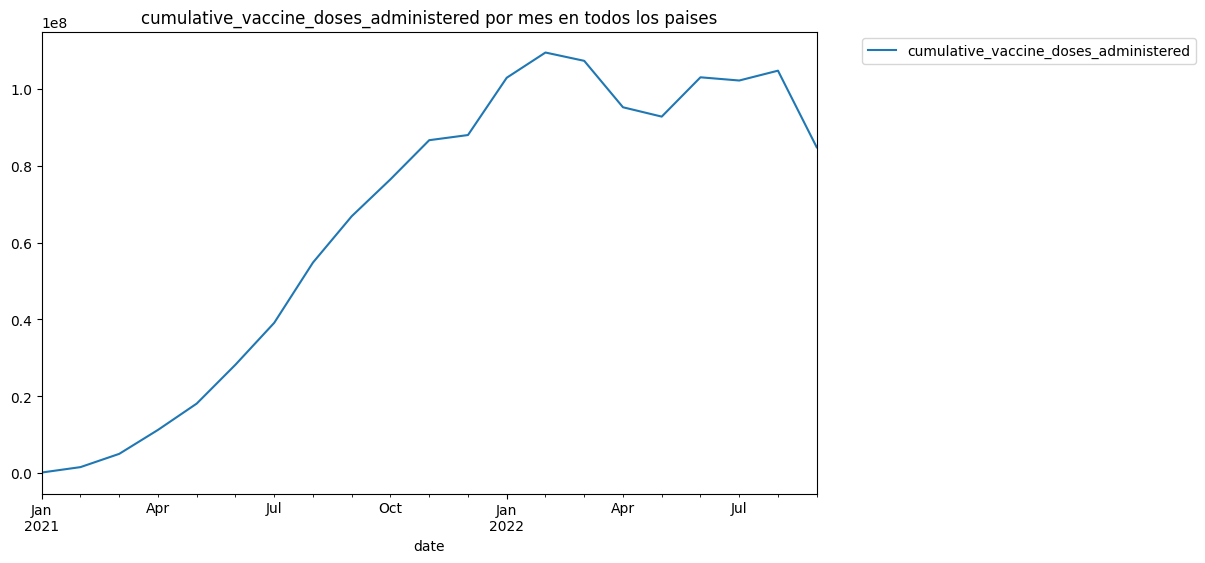

In [41]:
#Analizo como se comportan las variables a lo largo del tiempo (estudio longitudinal)
#Se hace una primera aproximación y se observa las dosis administradas por mes en todos los países (comportamiento)

#Grafico los valores medios de todos los paises cumulative_vaccine_doses_administered con líneas a lo largo del tiempo (series temporales)
data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])
data_latinoamerica.set_index('date', inplace=True)
fig,ax= plt.subplots(figsize=(10,6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot() #resample: hacer un resumen de nuestros datos en cierto período de tiempo (todo lo que pase en ese tiempo, que lo agrupe y lo asigne con promedio). Sólo valores númericos. Series con Pandas.
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes en todos los paises')
plt.show()

#En esta grafica se puede observar que la cantidad de dosis administradas en los 6 paises ha ido aumentando a lo largo del tiempo (análisis general).

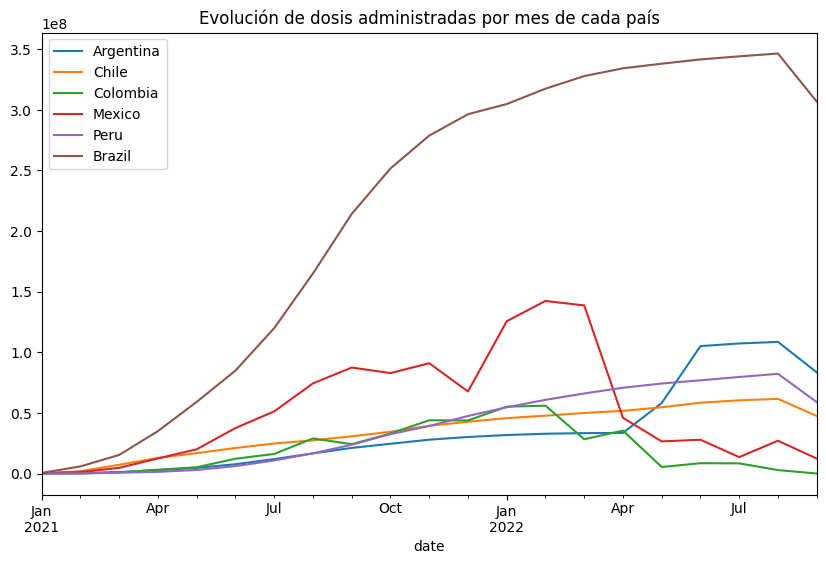

In [42]:
#Para un análisis detallado, vemos las dosis administradas por mes en cada país
fig,ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot() #también puedo usar .loc para el subset con en segundo espacio con columns
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.title('Evolución de dosis administradas por mes de cada país')
plt.show()

#promedio acumulado, brasil tiene mayor población. En algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo mientras que en otras va disminuyendo.
#Esto puede ser por varios factores, como la cantidad de vacunas disponibles, cantidad de personas que se han vacunado, entre otros.


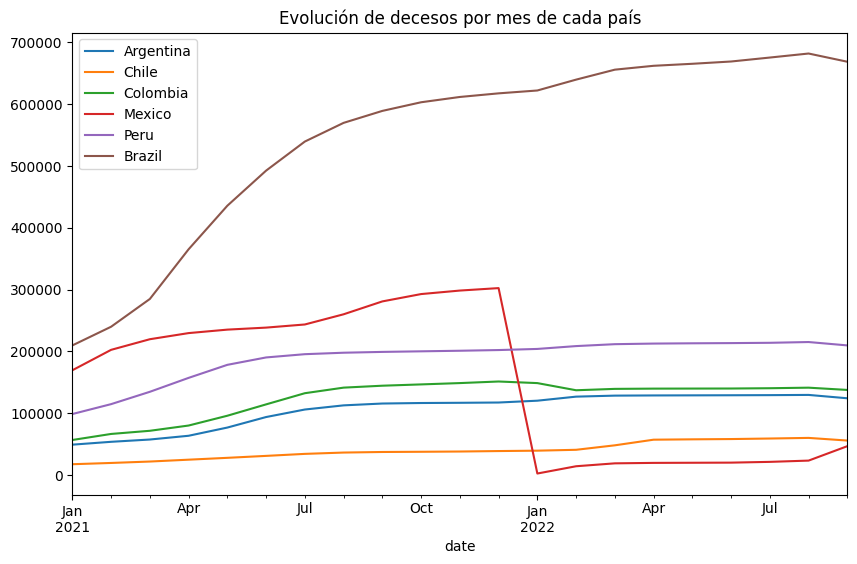

In [43]:
#Hago lo mismo para el acumulado de decesos
fig,ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot() #también puedo usar .loc para el subset con en segundo espacio con columns
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.title('Evolución de decesos por mes de cada país')
plt.show()

#El pais que más muertes tiene es brasil, mientras que mexico hubo una baja y puede ser que el gobierno ejecuto una estrategia en diciembre, se administraron más vacunas, alguna cepa ceso en esta época. Llego a aproximado a la media de chile.
#Hay que tener en cuenta la cantidad de habitantes de cada país ademas de otros factores y la cantidad de datos que tenemos. La disminuciñon de mexico tan drástica puede ser una perdida de datos o disminución real de casos, se puede hacer en un estudio posterior.

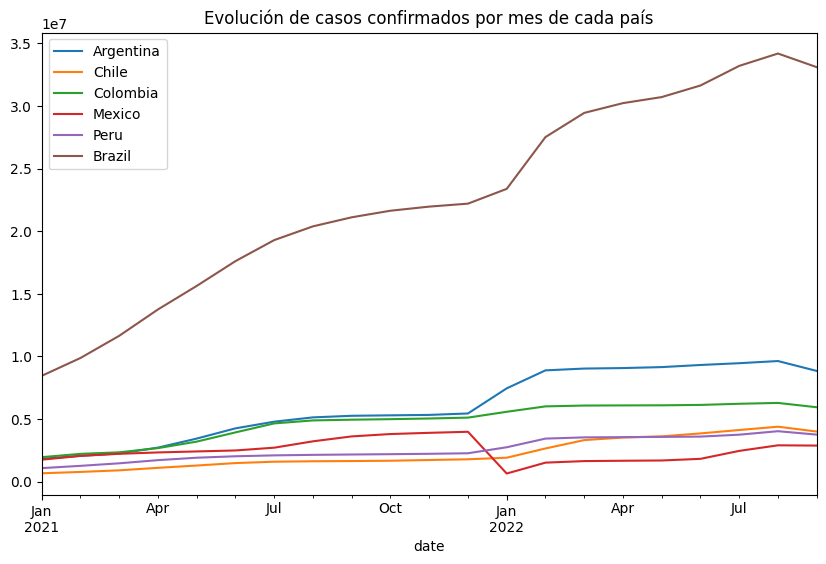

In [44]:
fig,ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot() #también puedo usar .loc para el subset con en segundo espacio con columns
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.title('Evolución de casos confirmados por mes de cada país')
plt.show()

#Se hace sobre lo acumulado para no tener una visión sesgada y ver que el país esta avanzando en el tiempo.El resample hace el promedio mensual del acumulado (divide el valor acumulado al final de cada mes por la cantidad de dias en ese mes)
# El país con mas casos confirmados es Brasil pero hay que tener en cuenta la cantidad de habitantes en cada país además de otros factores y la cantidad de datos que tenemos.

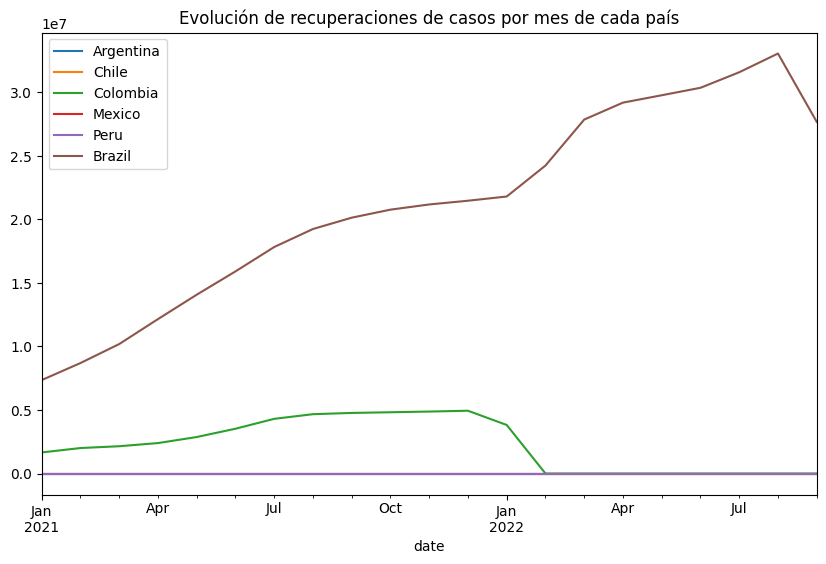

In [45]:
fig,ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot() #también puedo usar .loc para el subset con en segundo espacio con columns
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.title('Evolución de recuperaciones de casos por mes de cada país')
plt.show()

#El pais que más recuperados tuvo es brasil pero es lo mismo que ya se dijo anteriormente. Variable incompleta para algunos paises.

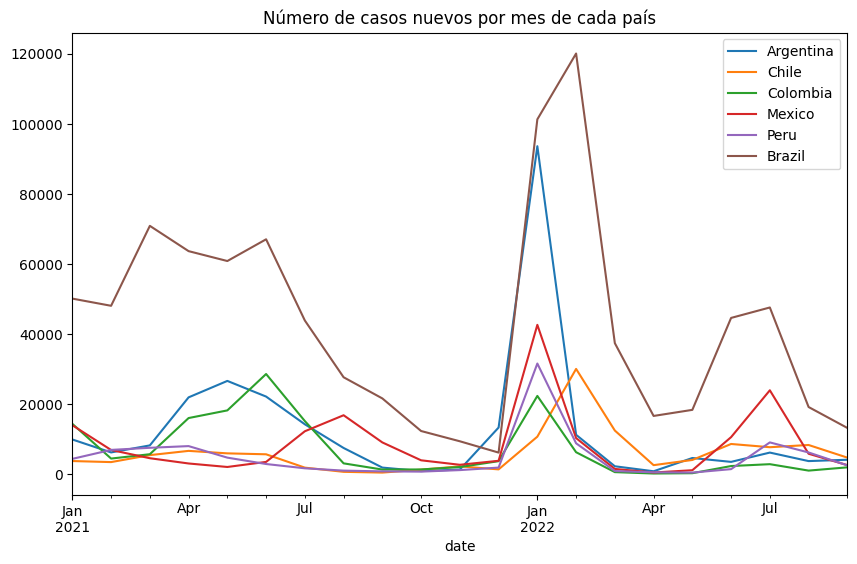

In [46]:
fig,ax= plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot() #también puedo usar .loc para el subset con en segundo espacio con columns
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.title('Número de casos nuevos por mes de cada país')
plt.show()

#El país que mejor manejo la pandemia fue Chile, ya que la cantidad de muertes y casos confirmados es menor, ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

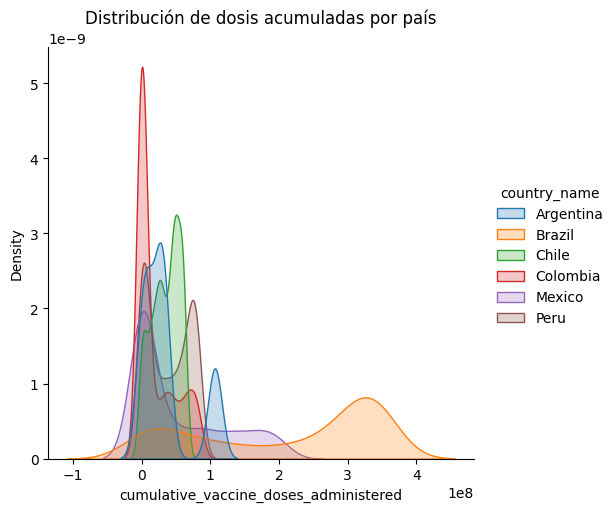

In [47]:
sns.displot(data_latinoamerica_paises,x='cumulative_vaccine_doses_administered',hue='country_name', kind='kde',fill=True)
plt.title('Distribución de dosis acumuladas por país')

#El país que peor manejo la pandemia fue brasil ya que la cantidad de muertes y casos confirmados es mayor, ademas de ser desproporcionada la cantidad de dosis de vacunas administradas.

###### Vacunación en brasil retrasada 
###### 1. Despliegue gradual de la vacunación: Es posible que el país haya comenzado su campaña de vacunación con un enfoque en ciertos grupos de población (por ejemplo, trabajadores de la salud, personas de mayor edad, grupos de riesgo) antes de ampliarla gradualmente a la población en general. Esto podría llevar a una baja densidad en valores bajos de dosis acumuladas al principio, seguida de un aumento gradual a medida que se vacunan más personas.
###### 2. Disponibilidad inicial limitada de vacunas: Al principio de la campaña de vacunación, es posible que el país haya tenido un suministro limitado de vacunas, lo que podría haber restringido la cantidad de dosis administradas. A medida que se obtienen más vacunas y se aumenta la capacidad de administración, la densidad en valores altos de dosis acumuladas podría aumentar.
###### 3. Desigualdades en el acceso a la vacunación: Es posible que al principio de la campaña de vacunación, solo ciertos grupos de la población tengan acceso a las vacunas, lo que podría llevar a una baja densidad en valores bajos de dosis acumuladas. Con el tiempo, a medida que se amplía el acceso a la vacunación, la densidad en valores altos de dosis acumuladas podría aumentar.

###### En resumen, una tendencia en la que la densidad de dosis acumuladas aumenta a medida que los valores de dosis acumuladas son más altos podría reflejar el progreso de la campaña de vacunación del país, especialmente si el país tiene una gran población. Sin embargo, la interpretación específica puede depender de los detalles y el contexto de la situación en ese país.


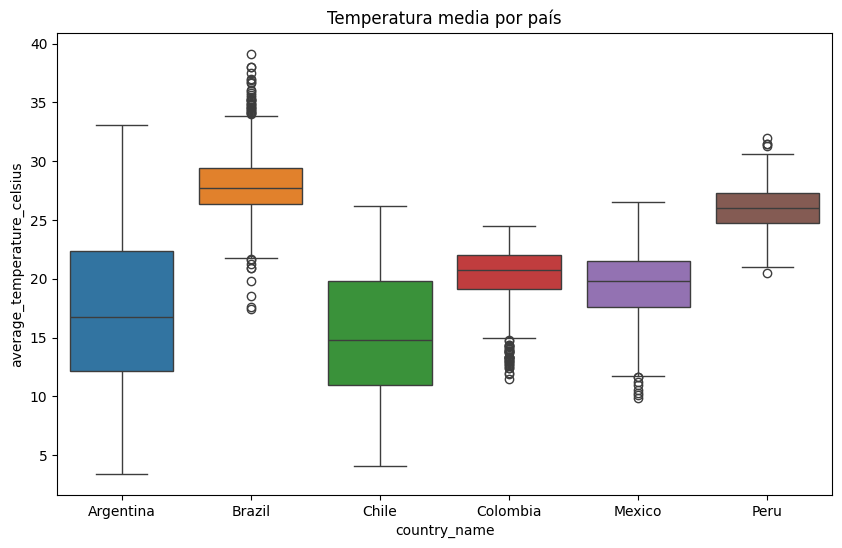

In [48]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig,ax= plt.subplots(figsize=(10,6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

#Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muerte, se puede observar que manejo mejor la pandemia que los demás paises.
#Esto poco a poco nos lleva a concluir que los nuevos centros podrían crearse en los países donde hay mas casos confirmados y muertes, ya que es donde se necesita más ayuda.
#Aún no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos.

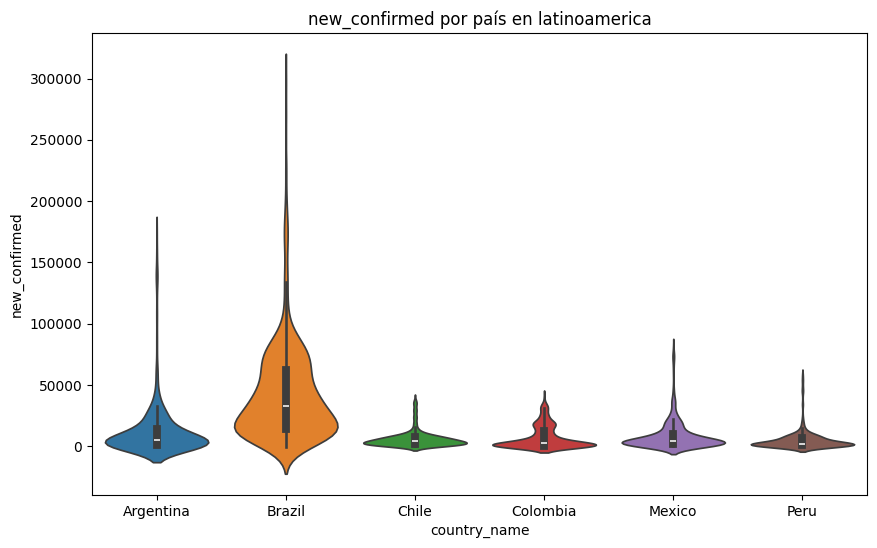

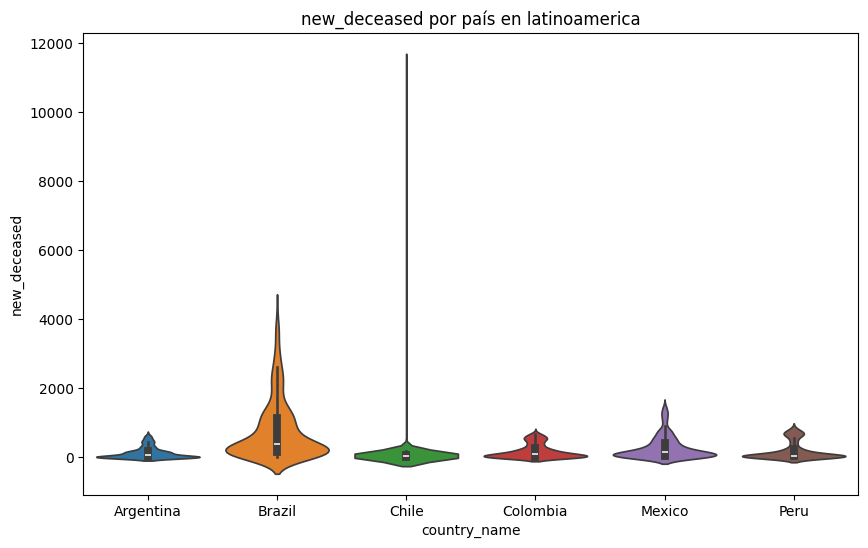

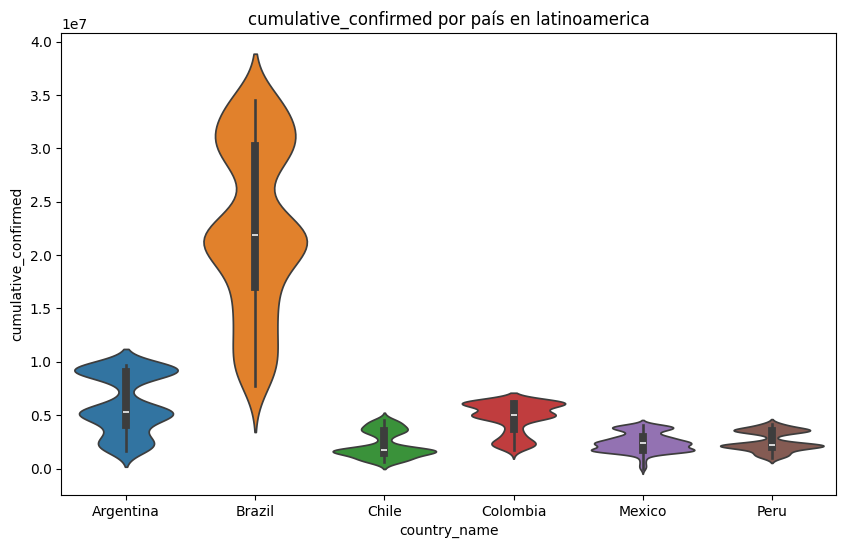

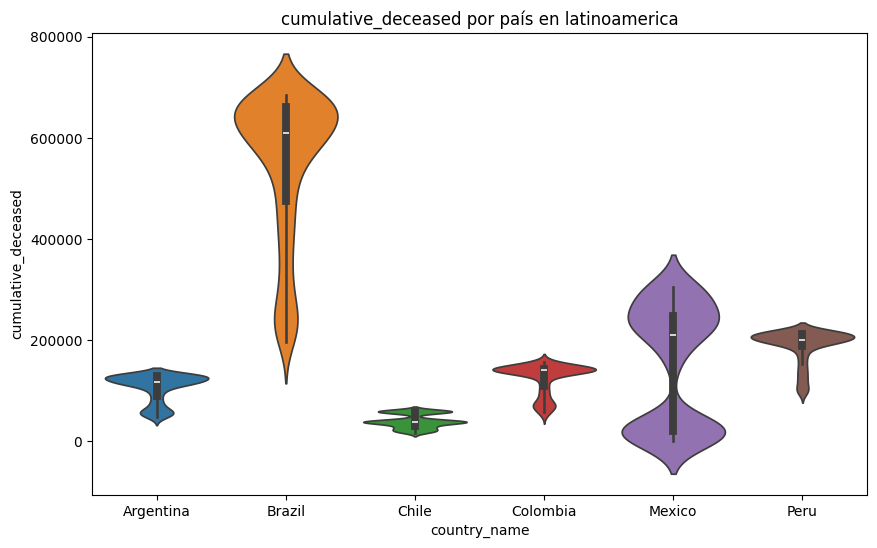

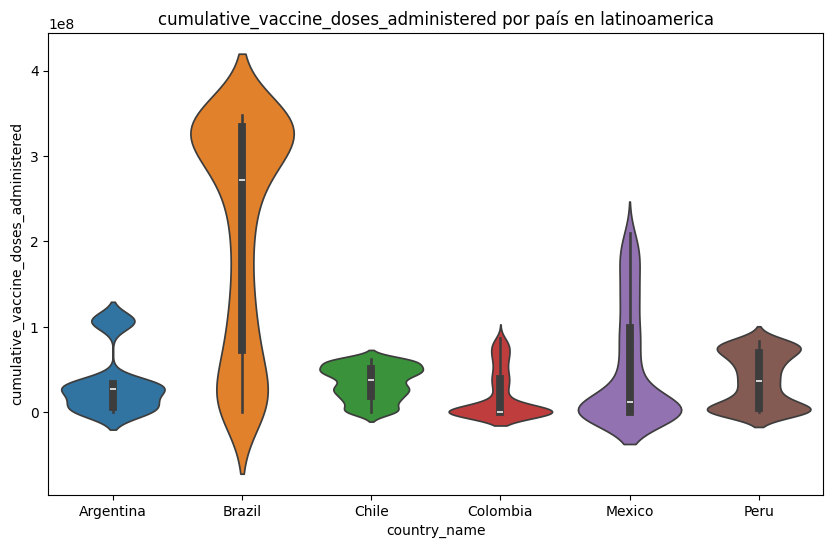

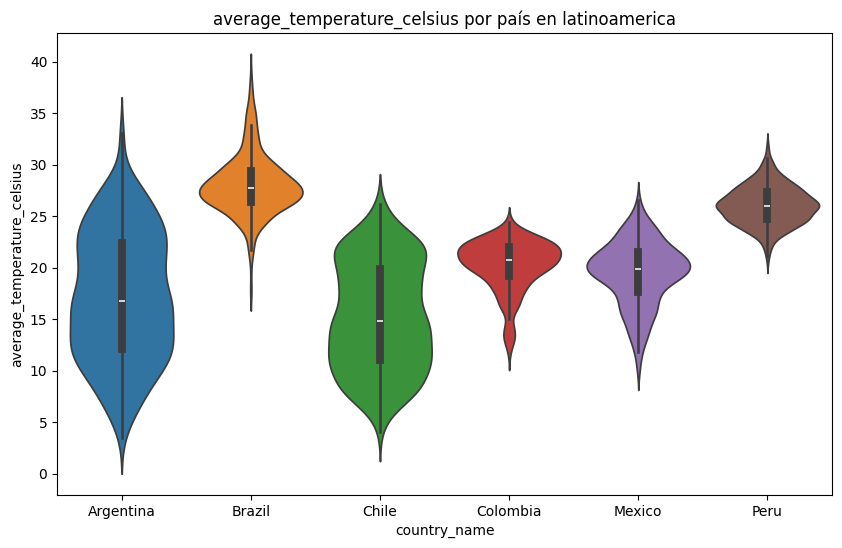

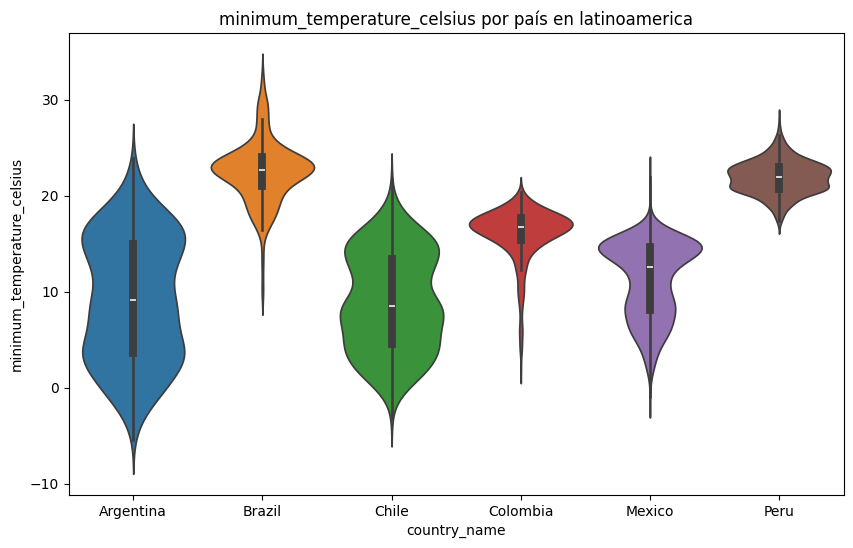

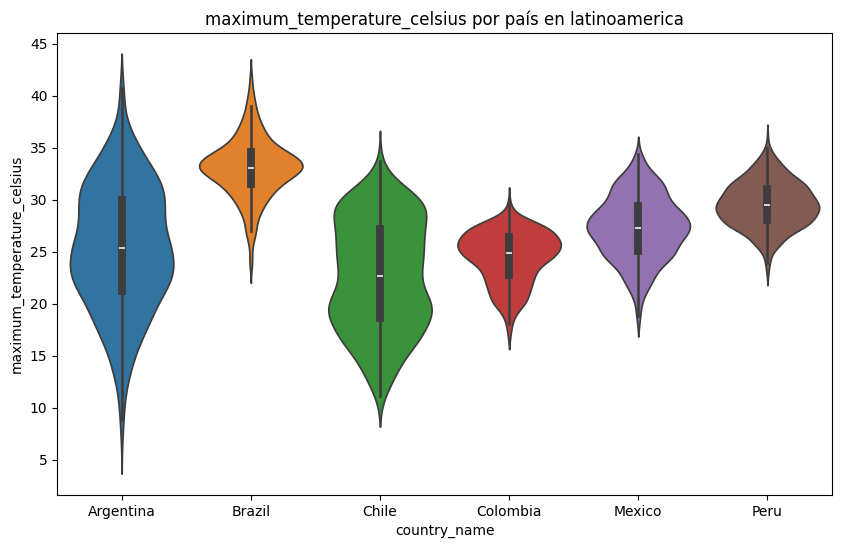

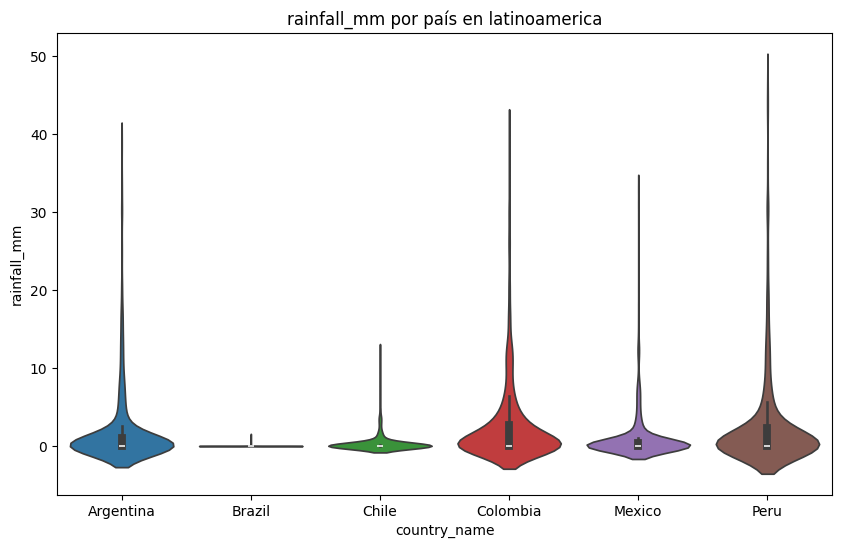

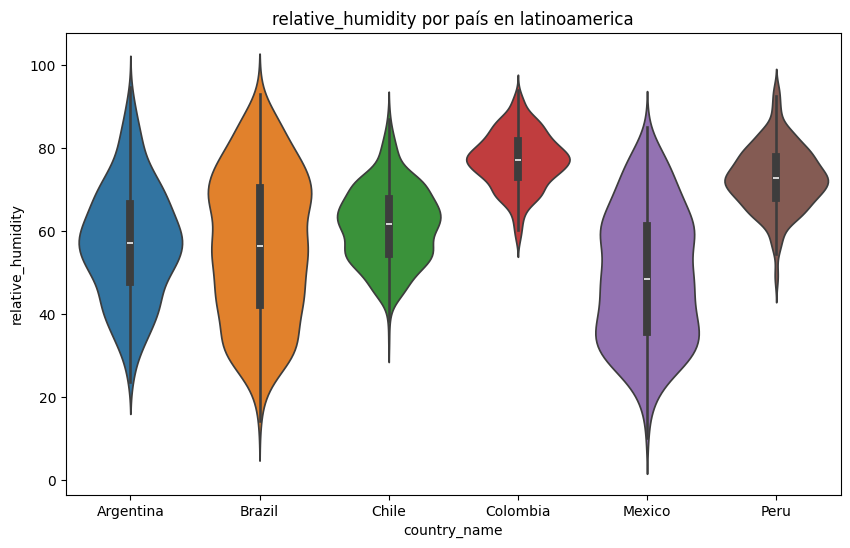

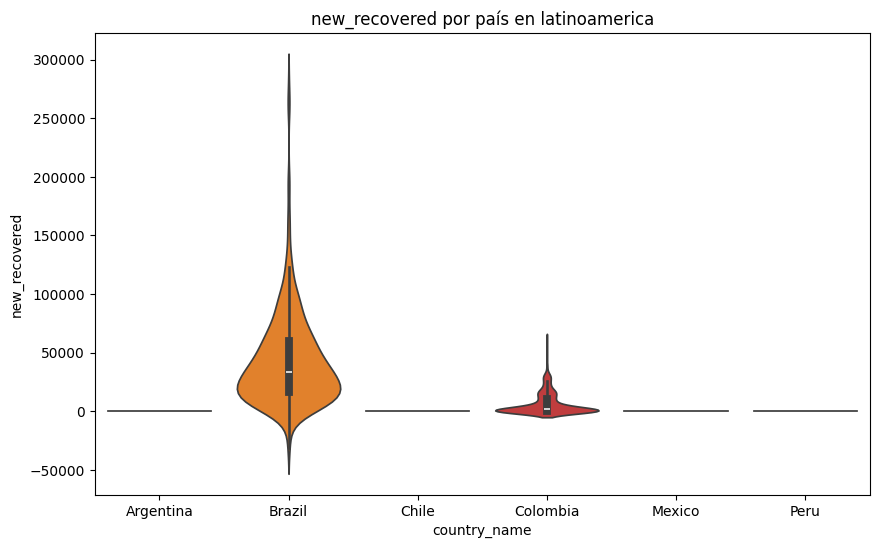

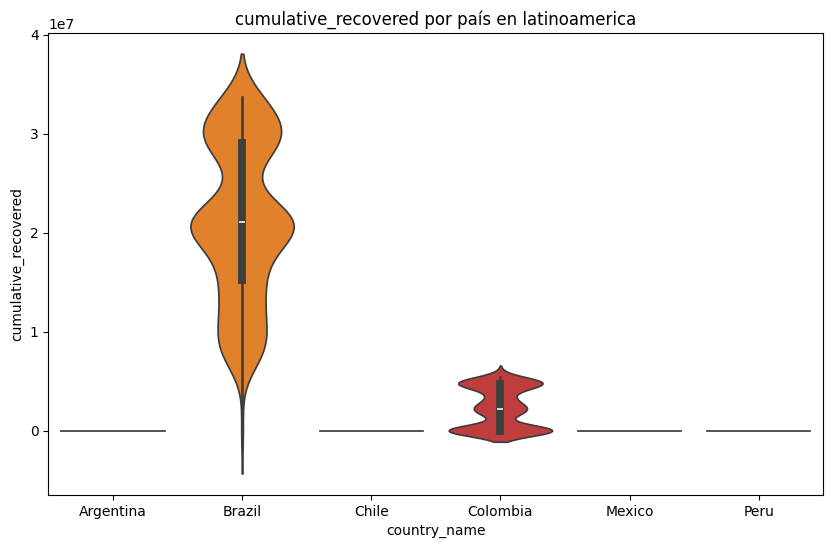

In [49]:
#Vemos como se comportan las variables a traves de violinplots
#Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i) 
columnas_mayores_6.append('country_name') #agregar a columnas_mayores_6 a columna country name para poder hacer analisis por país

#Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

#Violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']: 
        fig, ax = plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

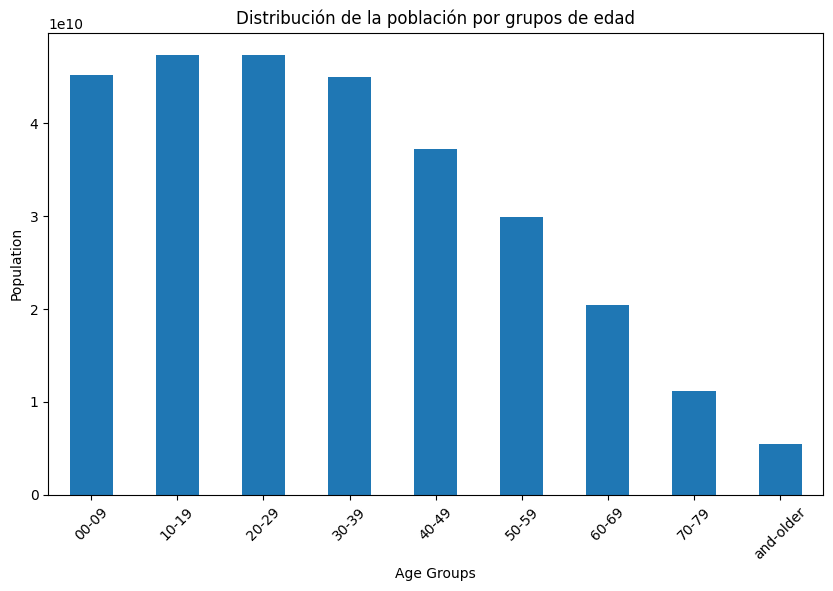

In [50]:
#Procedemos a analizar la distribuciñon de la poblacioón por grupos de edad en los paises seleccionados, para entender como se comporta la poblaciñon en cada país y tomas decisiones acetadas en el futuro.
# Calculamos la distribución de la población por grupos de edad

age_columns = ['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution = data_latinoamerica_paises[age_columns].sum() #Sobremuestra. Columna con registro igual para cada país(debo contar por ser valores unicos)

plt.figure(figsize=(10,6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)),[col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45) #expresión regular split, separando el texto a traves de ese caracter
plt.show()

#Aquñi puedo ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender como se comporta la población y nos da la idea de que podríamos graficar la cantidad de vacunas por cada grupo etareo

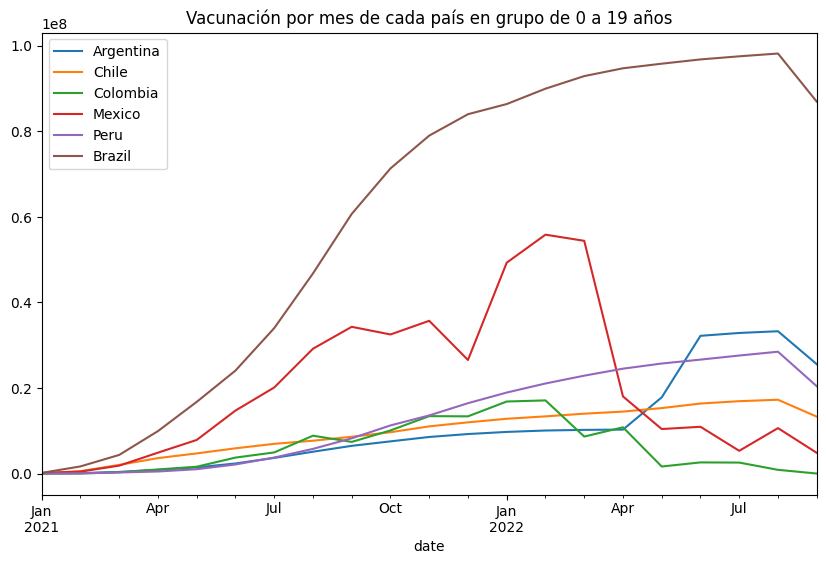

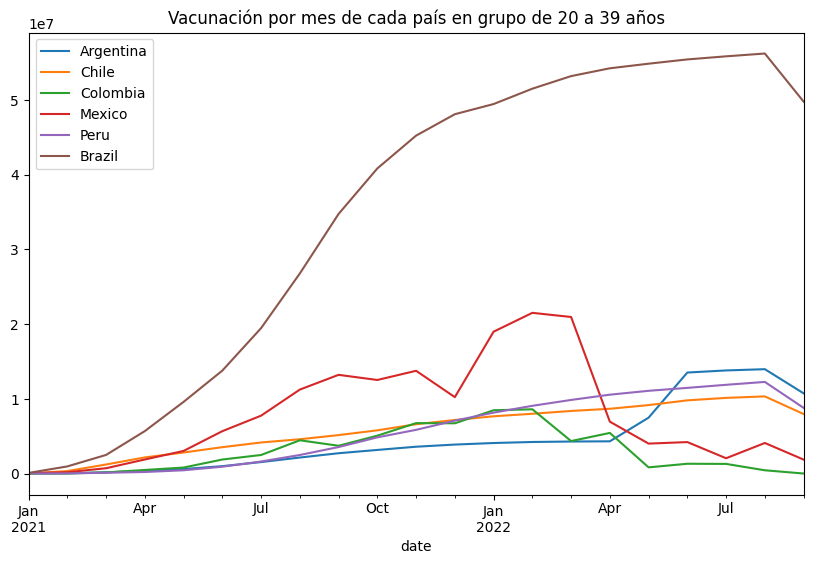

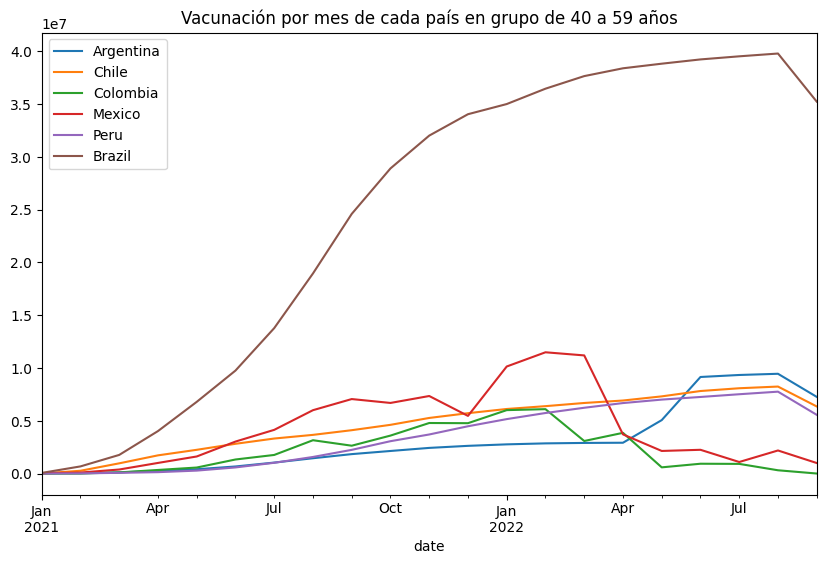

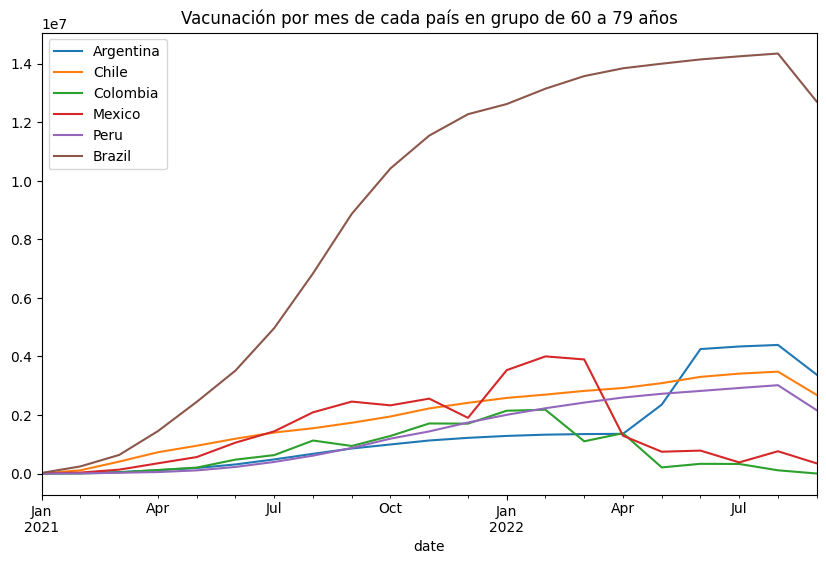

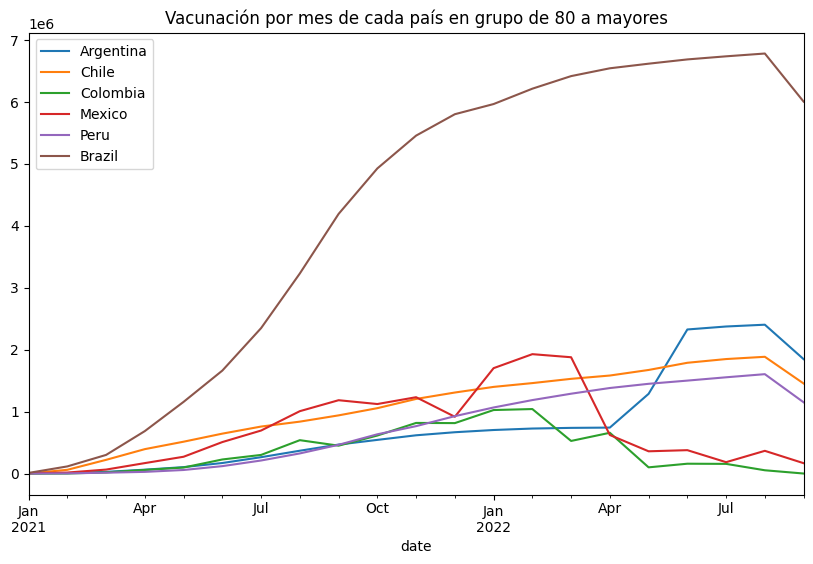

In [51]:
#Grupo etareo más vacunado:

data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+ data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+ data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+ data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+ data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_30_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_50_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_70_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

#Grafico de valores medios de todos los paises cumulative_vaccine_doses_administered
fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 40 a 59 años')
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 60 a 79 años')
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 80 a mayores')
plt.legend(bbox_to_anchor=(1.05,1))
plt.legend(paises_seleccionados)
plt.show()

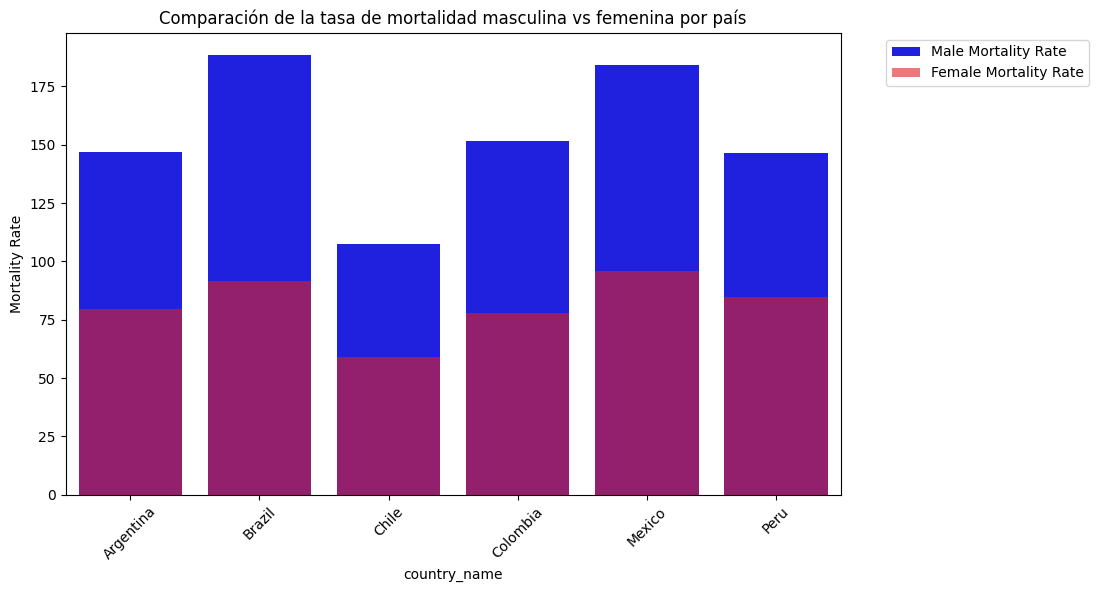

In [52]:
#Revisamos la mortalidad por genero para identificar la poblaciñon más vulnerable en cada país, con esto podríamos saber cual sería la población a vacunar primero

#Grafico de mortalidad por genero
plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises,x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises,x='country_name', y='adult_female_mortality_rate', color='red',alpha=0.6, label='Female Mortality Rate') #alpha opaca los colores
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs femenina por país')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

#Se observa que en todos la paises la cantidad de muertes es mayor en hombres que en mujeres, por lo que serían más vulnerables a la enfermedad o están menos protegidos.

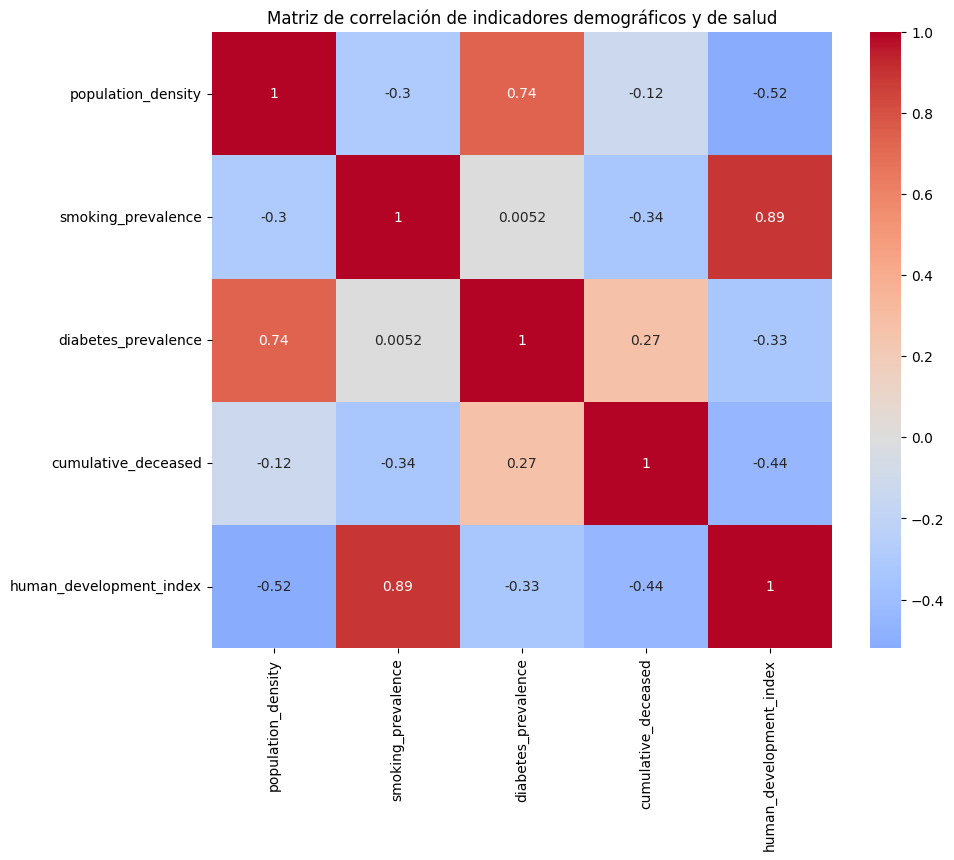

In [53]:
#Analizo con enfermedades preexistentes o comorbilidades. Veo si existe una correlacion entre las variables y si hay alguna enfermedad que sea más comun e los paises seleccionados y haya causado más muertes
#Selecciono un subset de columnas para los analisis de correlacion:
columns=['population_density','smoking_prevalence', 'diabetes_prevalence','cumulative_deceased','human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0) #me muestra los valores con annot True, no pongo mask > 0,5 ya que son pocas variables
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

#De la matriz podemos observar que fumar y tener diabetes son las enfermedades preexistentes que mas afectan a la población en los paises seleccionados, por lo que son las que mas muerte causaron en esos paises.
#Esto no quiere decir que son las unicas enfermedades que causan muertes, sino las mas comunes.

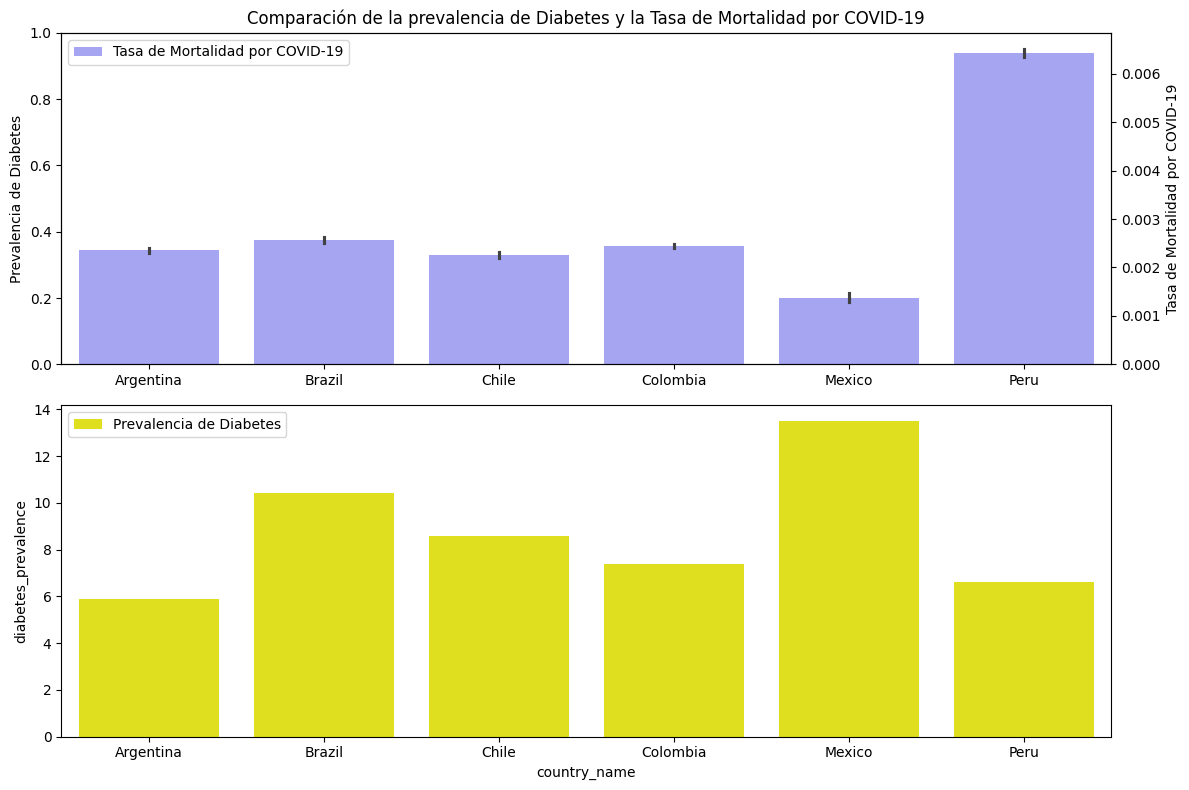

In [54]:
#Vemos como se comporta la mortalidad de los paises seleccionados por enfermedades preexistentes o comorbilidades
#hue no sirve para sobreponer datos

fig,(ax,ax2) = plt.subplots(2,1,figsize=(12,8)) #dos graficos
sns.barplot(data=data_latinoamerica_paises,x='country_name', y='diabetes_prevalence', color='yellow', label='Prevalencia de Diabetes')
ax2= ax.twinx()
sns.barplot(data=data_latinoamerica_paises,x='country_name', y=data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['population'], color='blue', label='Tasa de Mortalidad por COVID-19',alpha=0.4, ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

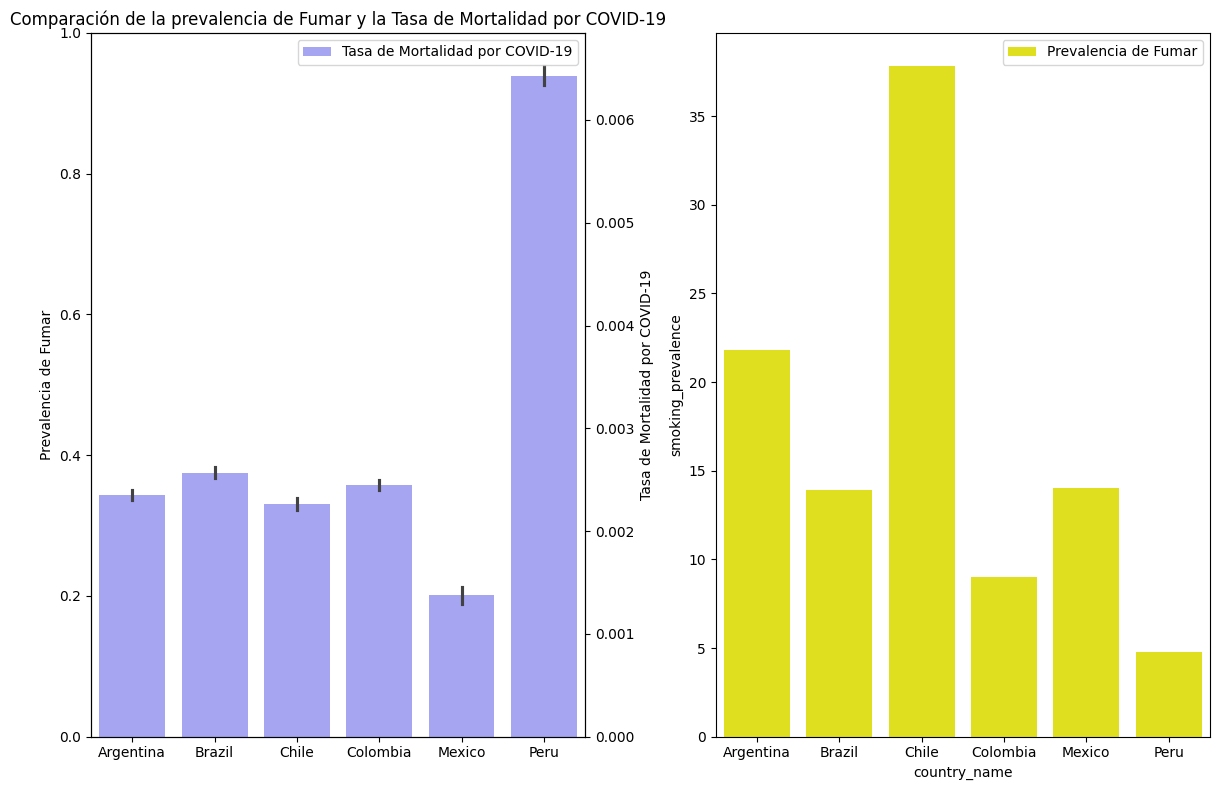

In [55]:
fig,(ax,ax2) = plt.subplots(1,2,figsize=(12,8)) #dos graficos
sns.barplot(data=data_latinoamerica_paises,x='country_name', y='smoking_prevalence', color='yellow', label='Prevalencia de Fumar')
ax2= ax.twinx()
sns.barplot(data=data_latinoamerica_paises,x='country_name', y=data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['population'], color='blue', label='Tasa de Mortalidad por COVID-19',alpha=0.4, ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

#Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, pero se puede observar que la diabetes es la enfermedad que mas muerte ha causado en los paises seleccionados.

##### Como conclusión del 2º avance. se puede decir que los países que más ayudan necesitan son Brasil, México y Colombia ya que son aquellos con más casos confirmados y muertes y que menos vacunas han administrados.
##### Las enfermedades preexistentes que más han afectado a la población son diabetes y fumar, por lo que son las que más muertes han causado. Esto no quiere decir que sean las únicas enfermedades, si que son las más comunes y de las que tenemos datos.

# *3° avance*

### 3. Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 

### 4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:

- Evolución de Casos Activos vs. Recuperados
- Tasa de Crecimiento (%)
- Relación entre la Cobertura de Vacunación y la Reducción de Casos
- ('País') Progreso de la vacunación por país
- Nuevos casos y temperatura promedio
- Impacto de la Urbanización en la Propagación del Covid-19
- Evolución Semanal de Casos Nuevos
- Evolución Anual de Casos Nuevos
- Distribución de la Población por Edad en Países
- Comparación de Estrategias de Vacunación en América Latina
- Evolución del Número de Muertes Diarias.
- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
- Variación Mensual de Casos y Muertes
- Análisis Temporal de la Mortalidad/
- Comparación de la Situación Actual (Contexto de los datos)

### 5. Investiga posibles correlaciones entre las distintas características.

### 6. Aplica las funciones creadas sobre cada columna de acuerdo a tus necesidades.

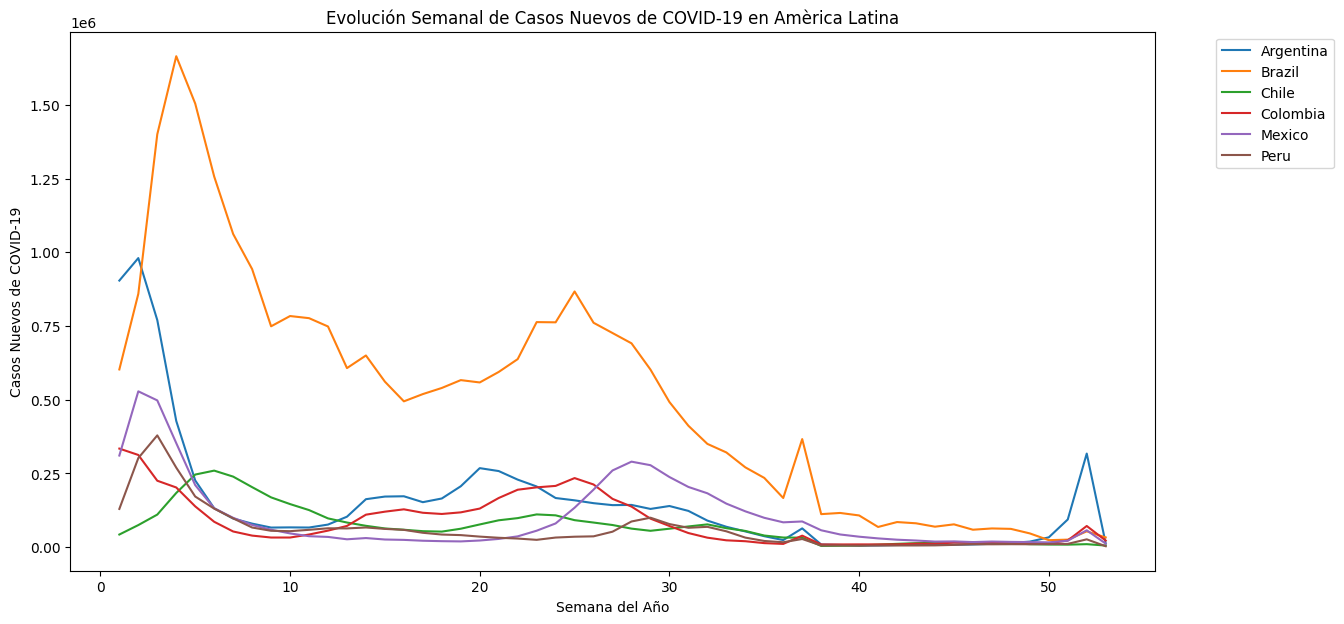

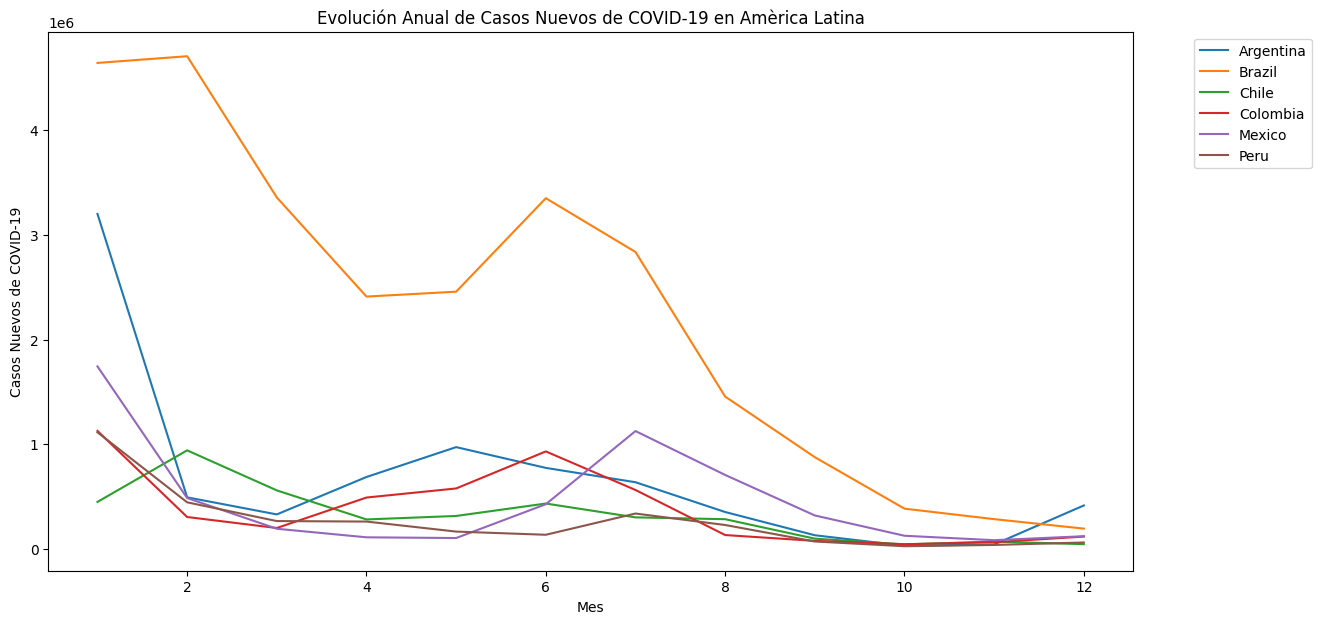

In [56]:
#Realizamos un analisis del comportamiento de manera semanal y anual, agrupando los datos por semana y por año con group by
#Vamos a analizar como evolucionan los casos de COVID-19 en America Latina a lo largo del tiempo por semana

data_latinoamerica_paises['week']=data_latinoamerica_paises.index.isocalendar().week
weekly_cases=data_latinoamerica_paises.groupby(['country_name','week'])['new_confirmed'].sum().reset_index() #agrupo por país y por semana. Reset index para que estas columnas se conviertan en normales en el DF resultante
plt.figure(figsize=(14,7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases=weekly_cases[weekly_cases['country_name']==country]
    plt.plot(country_weekly_cases['week'],country_weekly_cases['new_confirmed'], label=country)
    
plt.xlabel('Semana del Año') #52 semanas en un año
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en Amèrica Latina')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

#Ahora lo hacemos por año
data_latinoamerica_paises['month']=data_latinoamerica_paises.index.month
yearly_cases=data_latinoamerica_paises.groupby(['country_name','month'])['new_confirmed'].sum().reset_index() #3 variables, mes, casos y país
plt.figure(figsize=(14,7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases=yearly_cases[yearly_cases['country_name']==country]
    plt.plot(country_yearly_cases['month'],country_yearly_cases['new_confirmed'], label=country) #no estoy usando sns
    
plt.xlabel('Mes')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en Amèrica Latina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#En las primeras semanas tenemos un pico y esta alza puede ser por las fiestas en donde la gente se reune y no se cuida tanto. Luego esta tendencia baja, aprox en la semana 45.
#Lo mismo veo con los meses, en enero tengo el pico.
#A pesar de que los casos confirmados ha ido disminuyendo en el tiempo, no quiere decir que la pandemia haya terminado ya que la cantidad de nuevos confirmados sigue siendo alta por tener picos en las fechas finales.

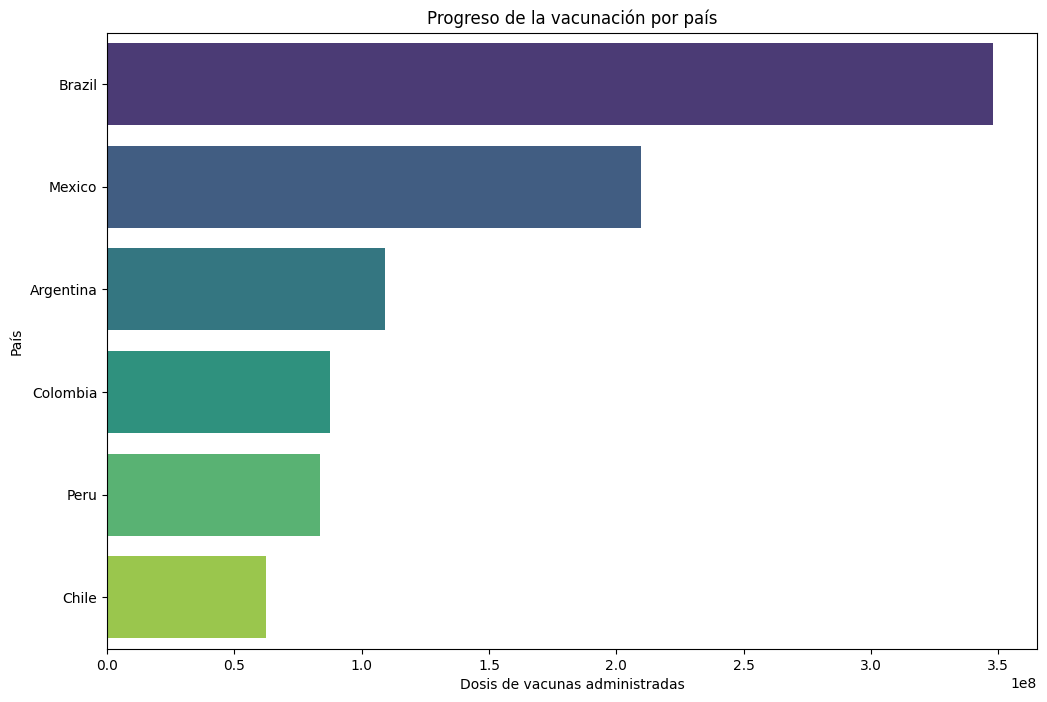

In [57]:
vaccination_data= data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False) #último valor va a ser el máximo por acumulado

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

#El país con mayor dosis administradas es Brasil, seguido de México. Se contradfice con los hallazgos anteriores pero se recuerda que debe tenerse en cuenta la población de cada país y la cantidad de vacunas disponibles.

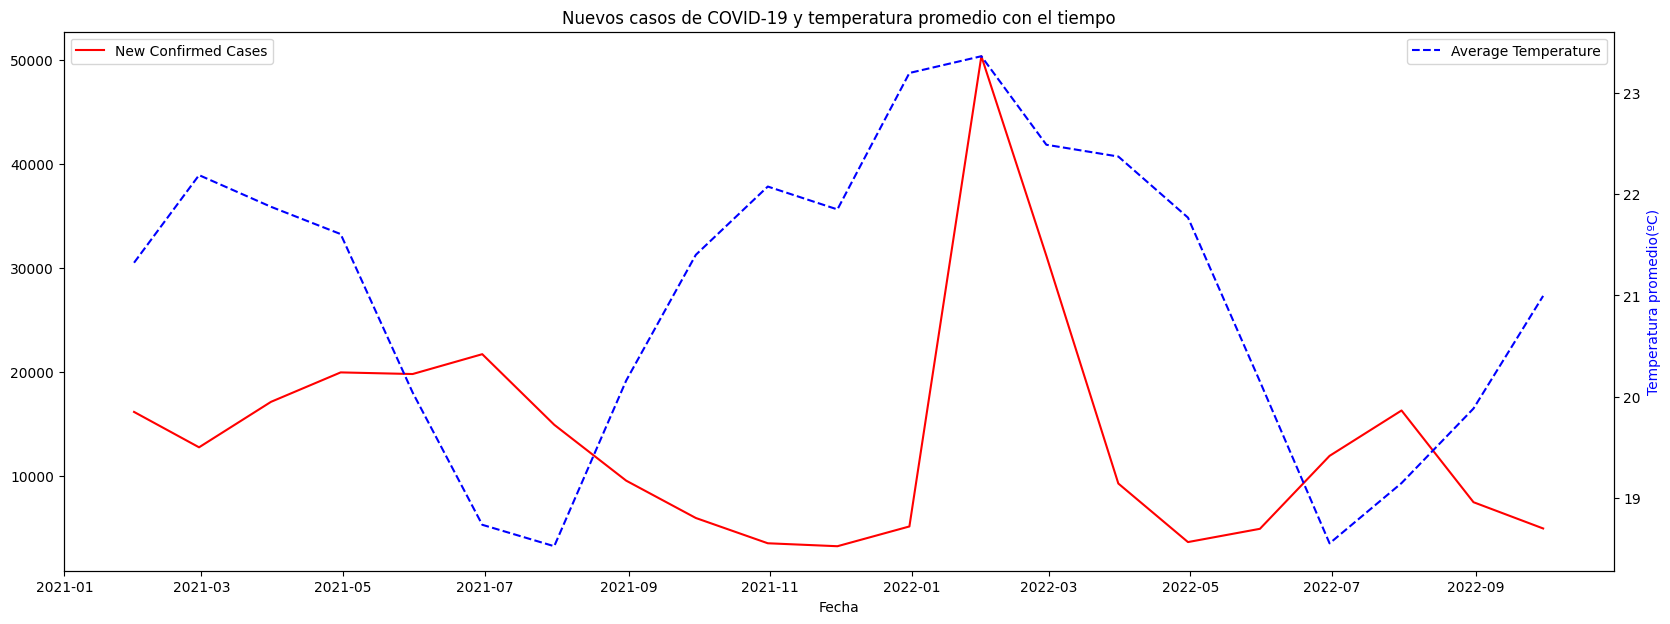

In [58]:
#Relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19
plt.figure(figsize=(20,7))
ax1=plt.gca()
ax2=ax1.twinx()
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax2.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio(ºC)', color='Blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo') 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()         

#Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo pero hubo un pico antes del mes de marzo que disminuyo rápidamente. Esto puede ser por la cantidad
#de vacunas administradas o por la cantidad de personas que se han vacunado.

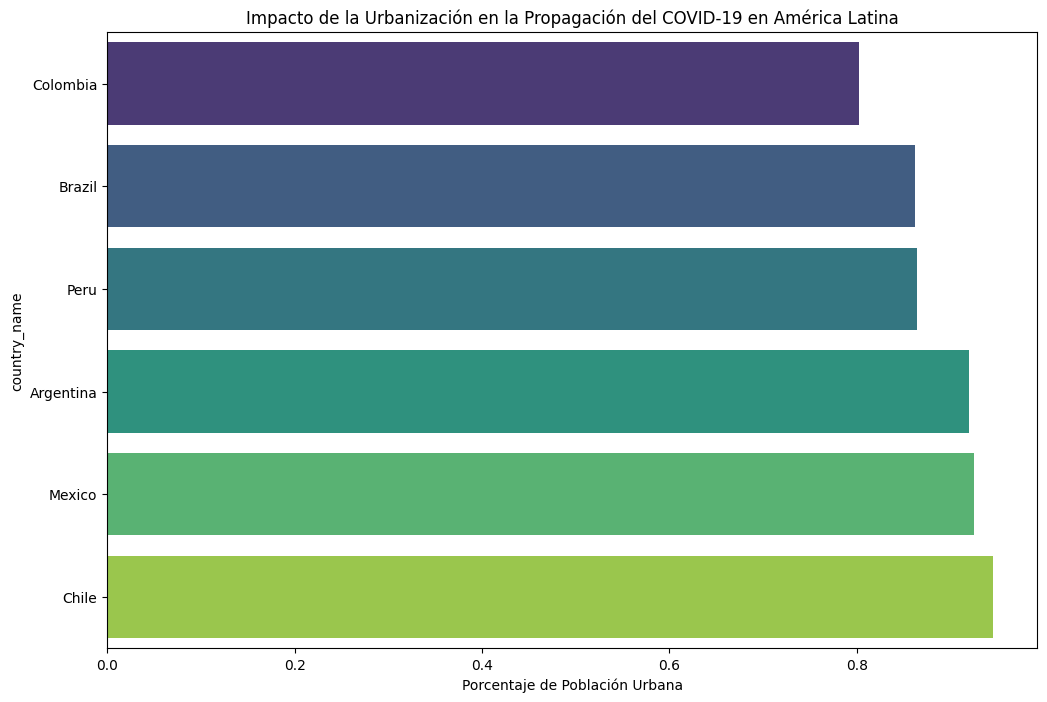

In [59]:
data_latinoamerica_paises['urban_population_percentage']= data_latinoamerica_paises['population_urban']/data_latinoamerica_paises['population'] #me quedo con la población urbana
urban_cases=data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage') #me quedo con el último registro de cada país (siempre el mismo valor, escojo uno puede ser max())

plt.figure(figsize=(12,8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index,hue=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')
plt.show()

#El pais con mayor impacto en la propagación fue Chile, aunque este país fue el que mejor manejo la pandemia (puede ser debido a la densidad de población de Chile)
#En chile no llego a la zona rural, si en la ciudad.

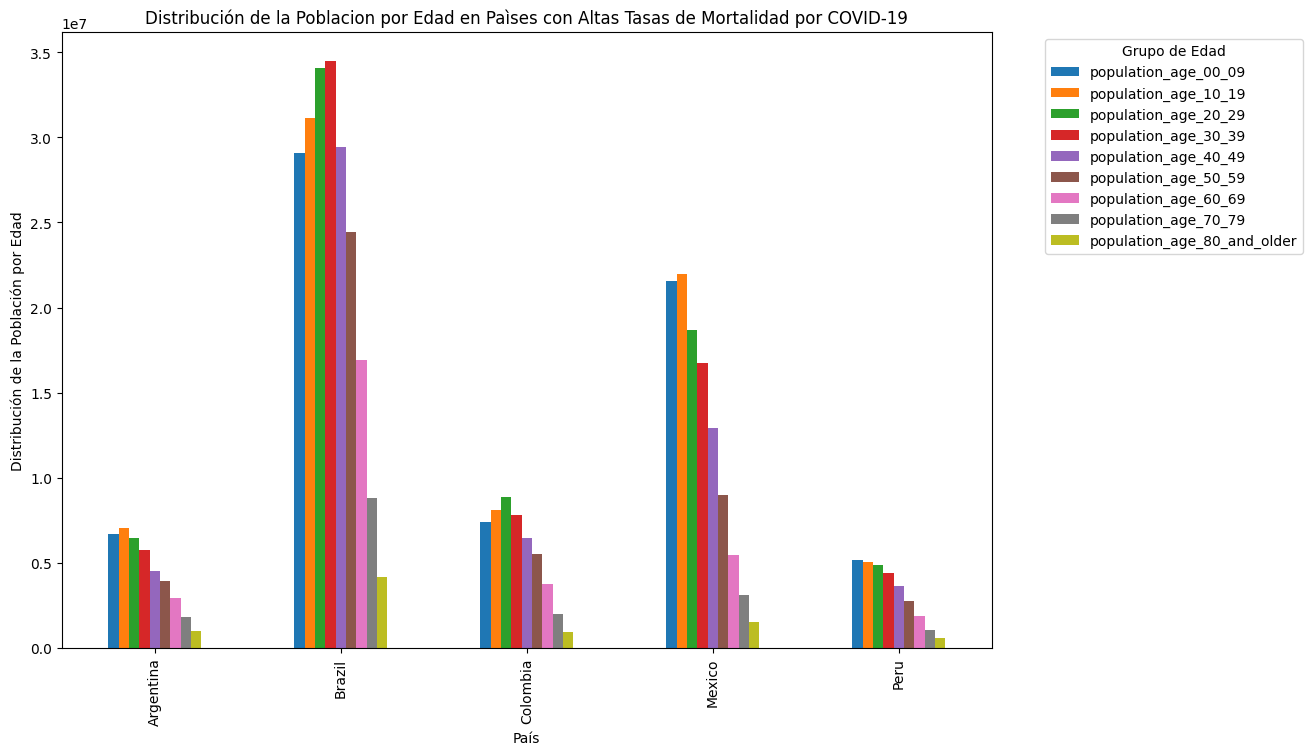

In [60]:
#Densidad de población por grupos de edad
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index #5 Países con alta tasa de mortalidad por COVID-19
age_groups=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution=data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean() #de todo el dataset elegir los 5 paises con alta mortalidad, agrupados por el promedio de la edad 

age_distribution.plot(kind='bar', stacked=False, figsize=(12,8)) #no una sobre otra
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Poblacion por Edad en Paìses con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left', title='Grupo de Edad')
plt.show()

#El grafico muestra la desigualdad en cantidades de poblaciñon por grupos de edad en los países seleccionados. Es bueno tenerlo en cuenta en futuros análisis.

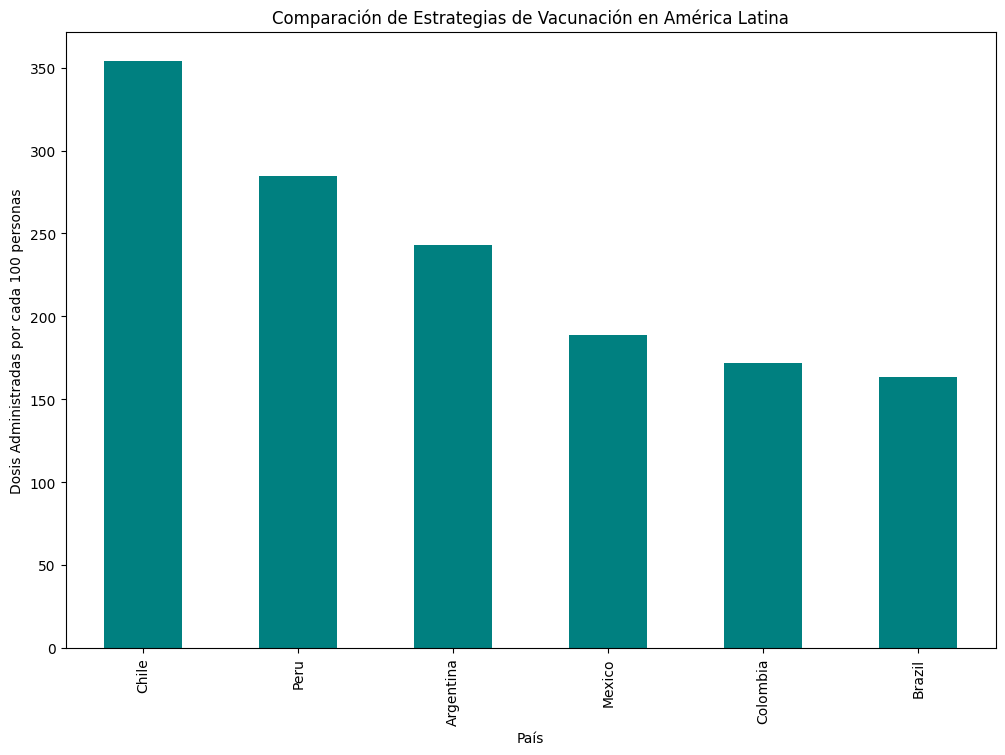

In [61]:
#Estrategias de vacunación para mitigar la mortalidad y casos confirmados
vaccination_strategy= data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max()*100 #puedo usar el last() también
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12,8), color='teal')

plt.xlabel('País')
plt.ylabel('Dosis Administradas por cada 100 personas')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

#Buen resultado de la politicas de Chile y una clara falla en Colombia y Brasil. Cada 100 había 350 dosis, probablemente porque eran vacunas con mas de 1 dosis.


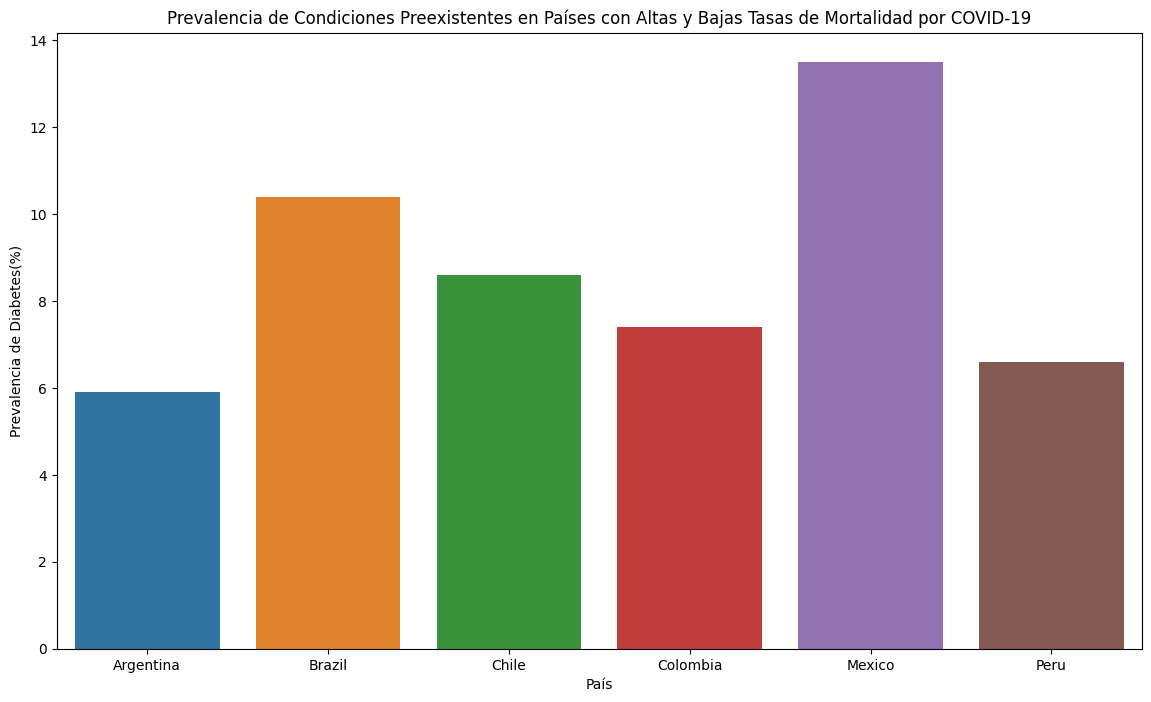

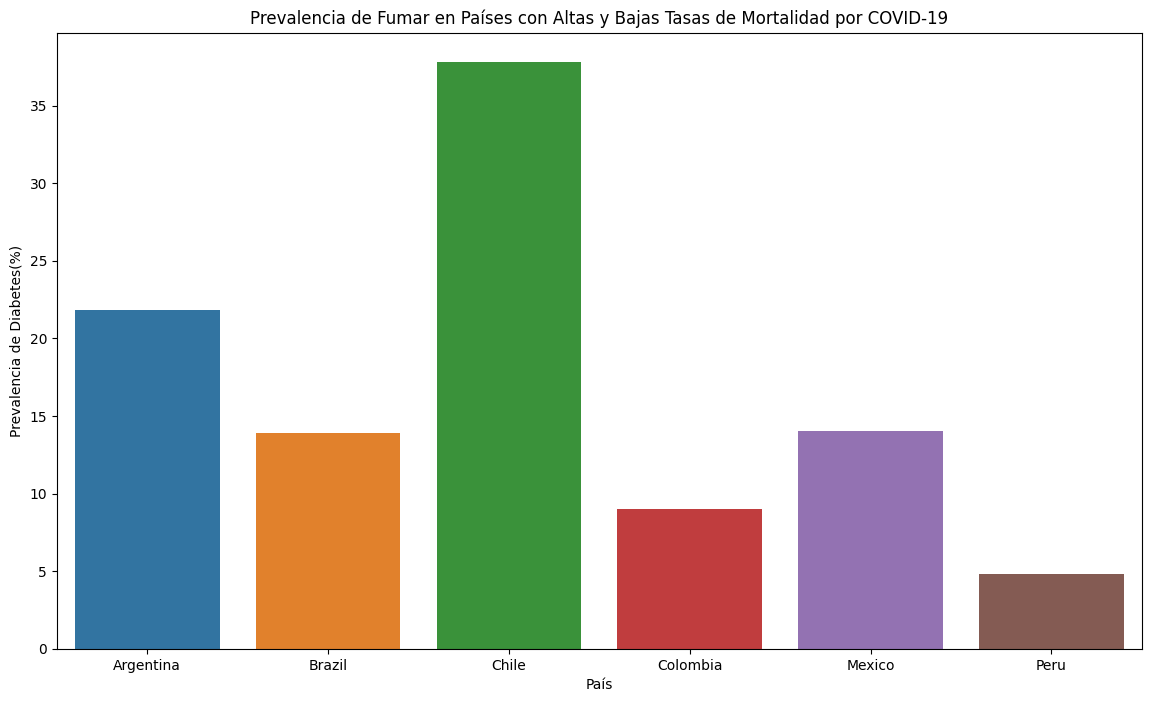

In [62]:
#Prevalencia de Diabetes en porcentajes para identificar países

top_countries= data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index #5 de 6 no es tan relevante pero sirve para otros analisis
bottom_countries= data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data= data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(bottom_countries))] #Paises en top y bottom, LEFT JOIN

plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence',hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes(%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

#Prevalencia de fumar
plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence',hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes(%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()    

#Identificamos que la diabetes afecta mucho mas a Mexico y Brasil, por lo que se podrñia decir que estos países sufren más esta enfermedad, mientras que fumar afecta más a Chile y Argentina.                                       

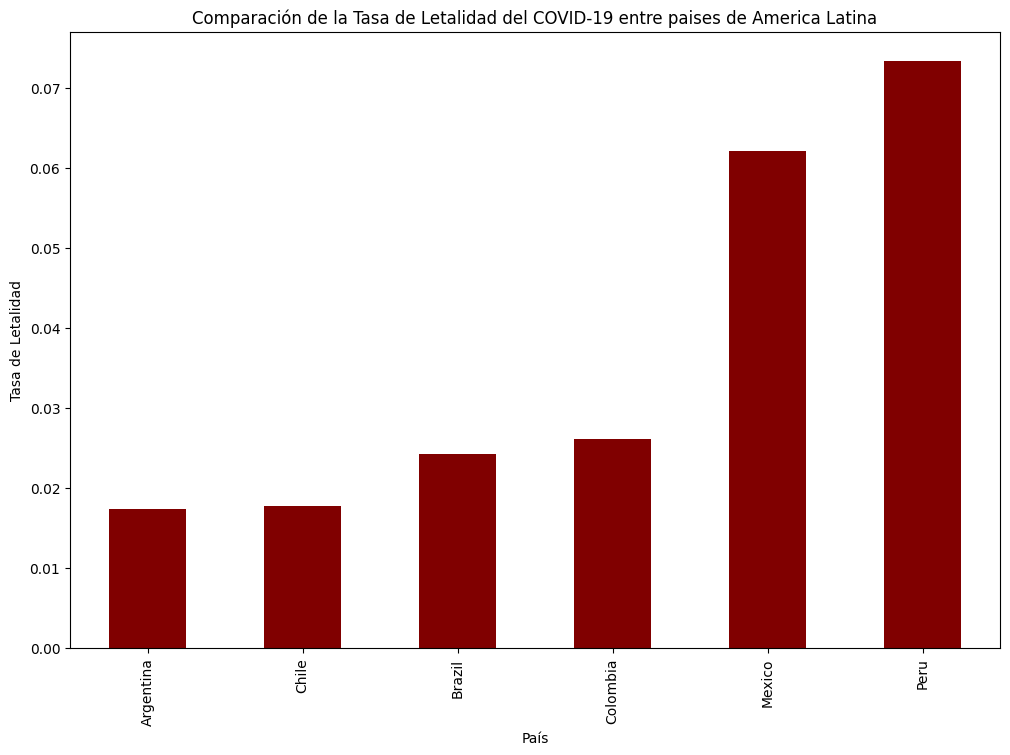

In [63]:
#Fatalidad por país

data_latinoamerica_paises['case_fatality_rate']= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates= data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12,8))
fatality_rates.plot(kind='bar',color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 entre paises de America Latina')
plt.show()   

#Aca tenes en cuenta otras enfermedades. Podes ver cuantos de los confirmados llegaron a la muerte.

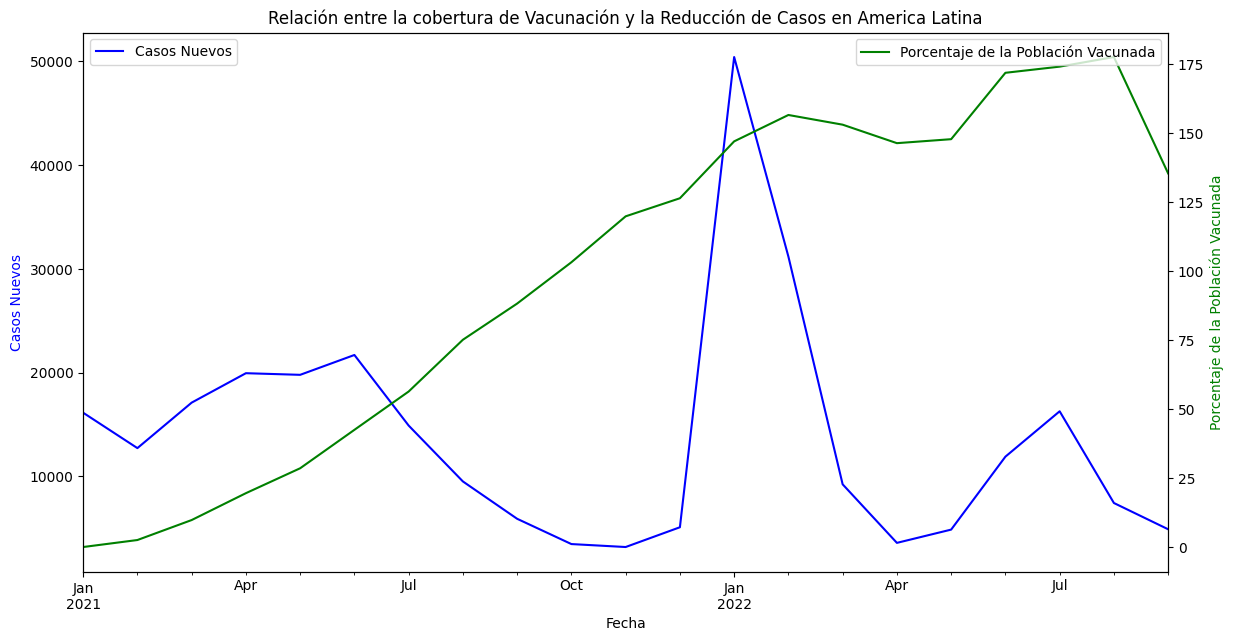

In [64]:
#Como evoluciona la vacunaciòn en America Latina y la reducción de casos de COVID-19

plt.figure(figsize=(14,7))
ax1=plt.gca() #creo la grafica
ax2=ax1.twinx() #usar el mismo eje cambiandolos en Y

#Creao porcentajes de vacunación
data_latinoamerica_paises['percentage_vaccinated']= data_latinoamerica_paises['cumulative_vaccine_doses_administered']/ data_latinoamerica_paises['population']*100
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la cobertura de Vacunación y la Reducción de Casos en America Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#En lo ultimo podemos tener 0 vacunados y el promedio baja con resample

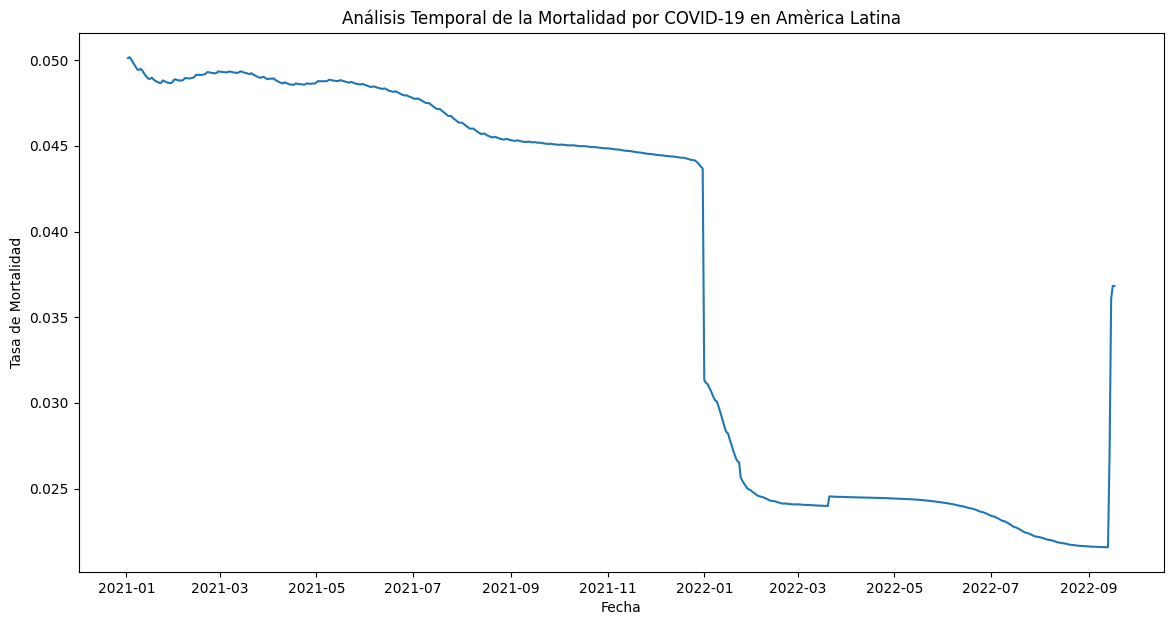

In [65]:
#Como evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = (data_latinoamerica_paises['cumulative_deceased']) / (data_latinoamerica_paises['cumulative_confirmed'])
print()

plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en Amèrica Latina')
plt.show()   

#Habría que hacer un resample para no tener caídas tan brutas o revisar los datos. Hay muchos datos nulos que fueron rellenados con el promedio y eso explica el alza final

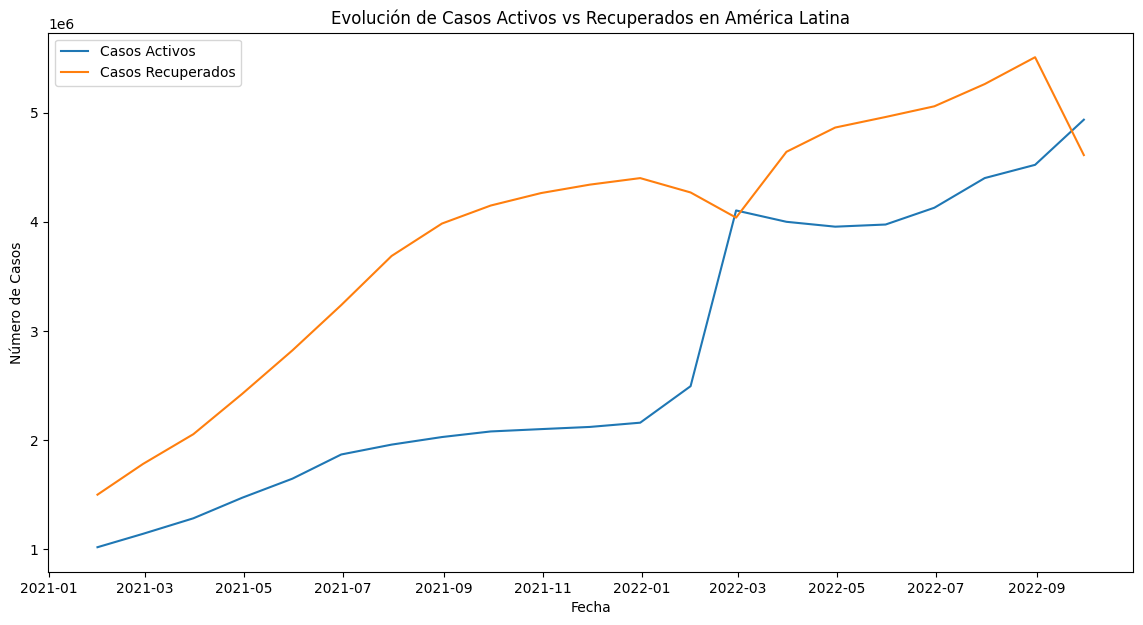

In [66]:
#Los casos activos han disminuido y los casos recuperado han aumentado, esto se debe a la vacunación y a las medidas tomadas por los países
#Como evolucionan los casos activos y recuperados en América Latina

data_latinoamerica_paises['active_cases']= data_latinoamerica_paises['cumulative_confirmed']-data_latinoamerica_paises['cumulative_deceased']-data_latinoamerica_paises['cumulative_recovered']

plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs Recuperados en América Latina')
plt.legend()
plt.show()   

#En marzo 2022 se juntan los recuperados (disminuye) con los activos (aumentan).

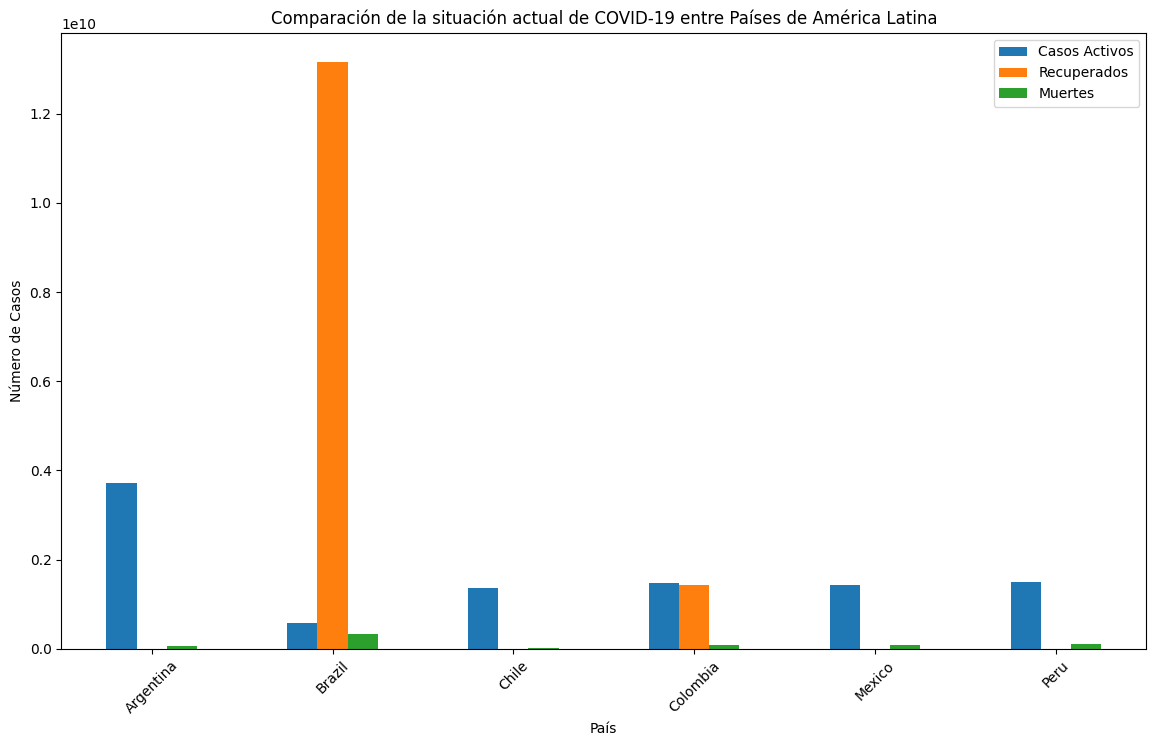

In [67]:
#No se tienen dato pero hay datos de recuperados y muertes en algunos países

current_situation= data_latinoamerica_paises.groupby('country_name').sum()[['active_cases','cumulative_recovered','cumulative_deceased']]

current_situation.plot(kind='bar', stacked=False, figsize=(14,8))
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.title('Comparación de la situación actual de COVID-19 entre Países de América Latina')
plt.legend(['Casos Activos', 'Recuperados','Muertes'])
plt.xticks(rotation=45)
plt.show()   


##### Por lo tanto los países donde debe expandirse la empresa farmaceutica son Brasil, México y Colombia ya que son los paìses con màs casos confirmados y muertes y con menos vacunas administradas. Las políticas de vacunación no han sido las mejores o no han tenido la cantidad de vacunas necesarias, esto swin tener en cuenta la densidad de la población y la cantidad de habitantes de cada país y los problemas socio-económicos que puedan afectar la cantidad de casos confirmados y muertes.

#### EXTRA CREDIT

In [68]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
#Para tener un mejor contexto graficamos la cantidad de vacunas administradas, los casos confirmados, muertes y recuperados

#Mapa para ver la distribución de casos confirmados, muertes, vacunas y recuperados

import folium
from folium.plugins import HeatMap



In [70]:
#Seleccionamos las columnas que vamos a utilizar
columns=['latitude', 'longitude', 'cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','cumulative_recovered']
data_map= data_latinoamerica_paises[columns].dropna()

#Creamos un mapa centrado en América Latina
map= folium.Map(location=[-14.235004,-51.92527], zoom_start=3)

#Creamos un mapa de calor para los casos confirmados
heat_map_confirmed= HeatMap(data=data_map[['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

#Creamos un mapa de calor para las muertes
heat_map_deceased= HeatMap(data=data_map[['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

#Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine= HeatMap(data=data_map[['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

#Creamos un mapa de calor para los recuperados
heat_map_recovered= HeatMap(data=data_map[['latitude','longitude','cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

In [71]:
data_latinoamerica_paises.shape

(3744, 65)

In [72]:
data_latinoamerica_paises.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   float64
 4   new_deceased                           3744 non-null   float64
 5   cumulative_confirmed                   3744 non-null   float64
 6   cumulative_deceased                    3744 non-null   float64
 7   cumulative_vaccine_doses_administered  3744 non-null   float64
 8   population                             3744 non-null   float64
 9   population_male                        3744 non-null   float64
 10  population_female                      3744 non-null  